In [1]:
#Importing Libraries
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import re
import wordcloud
from IPython.display import display
import fileupload
import io
import sys
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AZIZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AZIZ\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
#Loading the Survey Data
df = pd.read_excel('consolidated_survey.xlsx')
df['Opinion']=np.where(df['Do you feel work from home is better than working at office?']=='Yes','No','Yes')
df

ID             Completion time                  Sector  \
0      1         2021-09-15 17:37:32                CHEMICAL   
1      2         2021-09-15 18:15:15                CHEMICAL   
2      3         2021-09-16 10:26:44                CHEMICAL   
3      4         2021-09-16 11:23:23                CHEMICAL   
4      5         2021-09-16 11:29:34                CHEMICAL   
..   ...                         ...                     ...   
805  806  2021-09-18 13:53:51.746000  INFORMATION TECHNOLOGY   
806  807  2021-09-18 19:33:52.224000  INFORMATION TECHNOLOGY   
807  808  2021-09-18 19:48:52.006000  INFORMATION TECHNOLOGY   
808  809  2021-09-18 20:41:20.733000  INFORMATION TECHNOLOGY   
809  810  2021-09-19 10:56:06.451000  INFORMATION TECHNOLOGY   

     For how much duration you have done work from Home ( in months)  \
0                                                  1.0                 
1                                                  9.0                 
2                                                  4.0                 
3                                                  0.0                 
4                                                  0.0                 
..                                                 ...                 
805                                               17.0                 
806                                               17.0                 
807                                               17.0                 
808                                               17.0                 
809                                               13.0                 

    Do you have required infrastructure for working from home?  \
0                                                  Yes           
1                                                  Yes           
2                                                   No           
3                                                   No           
4                                                  Yes           
..                                                 ...           
805                                              Maybe           
806                                                Yes           
807                                                 No           
808                                                 No           
809                                              Maybe           

    Do you feel work from home is better than working at office?  \
0                                                   No             
1                                                   No             
2                                                   No             
3                                                   No             
4                                                   No             
..                                                 ...             
805                                                Yes             
806                                                Yes             
807                                                Yes             
808                                                 No             
809                                                Yes             

           Overall satisfaction with Working From Home Opinion  
0      Good - Occasionally can adopt working from home     Yes  
1      Good - Occasionally can adopt working from home     Yes  
2    Fine - Only in certain condition can adopt wor...     Yes  
3    Fine - Only in certain condition can adopt wor...     Yes  
4      Good - Occasionally can adopt working from home     Yes  
..                                                 ...     ...  
805                               Always ready for WFH      No  
806                       Some days to visit to office      No  
807                       Some days to visit to office      No  
808                           Occasionally WFH is good     Yes  
809                       Some days to visit to

In [3]:
df.dtypes

ID                                                                   int64
Completion time                                                     object
Sector                                                              object
For how much duration you have done work from Home ( in months)    float64
Do you have required infrastructure for working from home?          object
Do you feel work from home is better than working at office?        object
Overall satisfaction with Working From Home                         object
Opinion                                                             object
dtype: object

<ipython-input-4-14dac5b00834>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Votes'] =1


Votes
Sector                 Opinion       
CHEMICAL               Yes        122
ELECTRONICS            No         235
                       Yes        224
INFORMATION TECHNOLOGY No         139
                       Yes         90

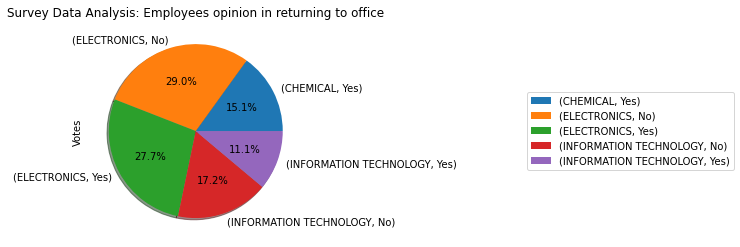

In [4]:
#Performing Grouping and Aggregation Operation based on Industry Sector
df_1 = df[["Sector","Opinion"]]
df_1['Votes'] =1
group_data = df_1.groupby(['Sector','Opinion'])[['Votes']].sum() #sum function
display(group_data)

group_data.plot(kind='pie', y='Votes', autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Survey Data Analysis: Employees opinion in returning to office', color='black')
plt.legend(loc='center left', bbox_to_anchor=(2.0, 0.5))
plt.show()

<ipython-input-5-fcd8b7f4e808>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Votes'] =1


Votes
Opinion       
No         374
Yes        436

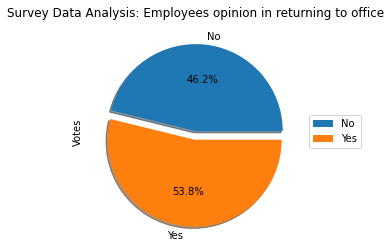

In [5]:
#Performing Grouping and Aggregation Operation on overall survey data for consolidation
df_2 = df[["Opinion"]]
df_2['Votes'] =1
group_data_2 = df_2.groupby(['Opinion'])[['Votes']].sum() #sum function
display(group_data_2)

group_data_2.plot(kind='pie', y='Votes', autopct='%1.1f%%', explode=(0, 0.1), shadow=True, startangle=0)
plt.title('Survey Data Analysis: Employees opinion in returning to office', color='black')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [6]:
import numpy as np   #Linear algera Library
import pandas as pd
import matplotlib.pyplot as plt  #to plot graphs
import seaborn as sns  #to plot graphs
sns.set()  #setting seaborn as default 
import warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('WFH_WFO_dataset.csv')
data.head()

ID    Name   Age Occupation  Gender Same_ofiice_home_location kids  \
0  1.0  User 1  45.0      Tutor  Female                       Yes  Yes   
1  2.0  User 2  24.0      Tutor    Male                        No   No   
2  3.0  User 3  53.0         HR  Female                       Yes  Yes   
3  4.0  User 4  26.0   Engineer  Female                       Yes   No   
4  5.0  User 5  26.0  Recruiter    Male                       Yes   No   

  RM_save_money RM_quality_time RM_better_sleep calmer_stressed  \
0           Yes             Yes             Yes          CALMER   
1            No              No              No          CALMER   
2           Yes             Yes             Yes          CALMER   
3           Yes             Yes              No        STRESSED   
4            No             Yes              No        STRESSED   

   RM_professional_growth  RM_lazy  RM_productive digital_connect_sufficient  \
0                     5.0      1.0            5.0                        Yes   
1                     2.0      2.0            2.0                         No   
2                     3.0      3.0            4.0                         No   
3                     3.0      4.0            4.0                         No   
4                     3.0      3.0            5.0                        Yes   

   RM_better_work_life_balance  RM_improved_skillset RM_job_opportunities  \
0                          5.0                   5.0                  Yes   
1                          3.0                   3.0                   No   
2                          5.0                   3.0                   No   
3                          4.0                   5.0                  Yes   
4                          4.0                   2.0                  Yes   

   Target      feedback  
0     1.0  Hybrid Model  
1     1.0  Hybrid Model  
2     1.0  Hybrid Model  
3     0.0  Hybrid Model  
4     1.0  Hybrid Model

In [8]:
data.dtypes

ID                             float64
Name                            object
Age                            float64
Occupation                      object
Gender                          object
Same_ofiice_home_location       object
kids                            object
RM_save_money                   object
RM_quality_time                 object
RM_better_sleep                 object
calmer_stressed                 object
RM_professional_growth         float64
RM_lazy                        float64
RM_productive                  float64
digital_connect_sufficient      object
RM_better_work_life_balance    float64
RM_improved_skillset           float64
RM_job_opportunities            object
Target                         float64
feedback                        object
dtype: object

In [9]:
data.columns

Index(['ID', 'Name', 'Age', 'Occupation', 'Gender',
       'Same_ofiice_home_location', 'kids', 'RM_save_money', 'RM_quality_time',
       'RM_better_sleep', 'calmer_stressed', 'RM_professional_growth',
       'RM_lazy', 'RM_productive', 'digital_connect_sufficient',
       'RM_better_work_life_balance', 'RM_improved_skillset',
       'RM_job_opportunities', 'Target', 'feedback'],
      dtype='object')

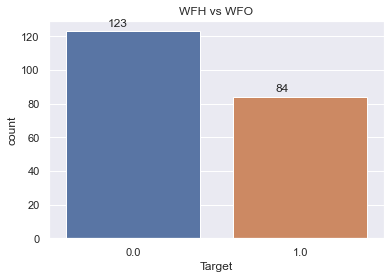

In [10]:
#WFH/remote work for sure -1
#I'd rather go back to office -0
ax=sns.countplot(x='Target',data=data)
plt.title('WFH vs WFO')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+3)) 

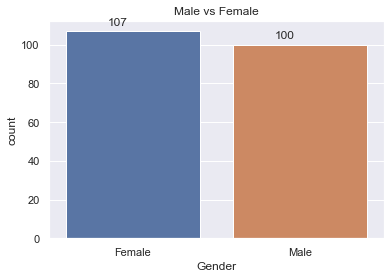

In [11]:
ax=sns.countplot(x='Gender',data=data)
plt.title('Male vs Female')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+3))

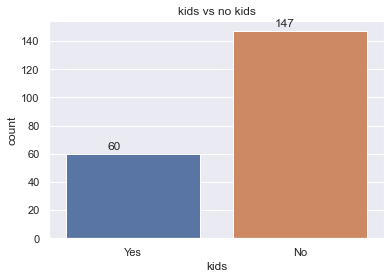

In [12]:
ax=sns.countplot(x='kids',data=data)
plt.title('kids vs no kids')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+3)) 

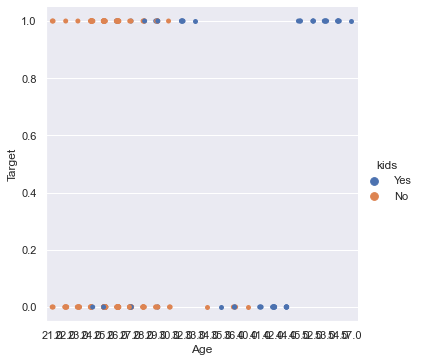

In [13]:
sns.catplot(x='Age',y='Target',data=data,hue='kids')

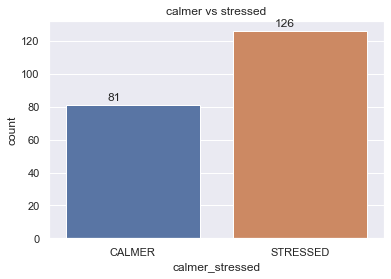

In [14]:
ax=sns.countplot(x='calmer_stressed',data=data)
plt.title('calmer vs stressed')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+3)) 

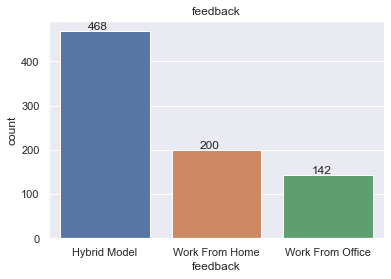

In [15]:
ax=sns.countplot(x='feedback',data=data)
plt.title('feedback')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+3)) 

In [16]:
data.head(1)

ID    Name   Age Occupation  Gender Same_ofiice_home_location kids  \
0  1.0  User 1  45.0      Tutor  Female                       Yes  Yes   

  RM_save_money RM_quality_time RM_better_sleep calmer_stressed  \
0           Yes             Yes             Yes          CALMER   

   RM_professional_growth  RM_lazy  RM_productive digital_connect_sufficient  \
0                     5.0      1.0            5.0                        Yes   

   RM_better_work_life_balance  RM_improved_skillset RM_job_opportunities  \
0                          5.0                   5.0                  Yes   

   Target      feedback  
0     1.0  Hybrid Model

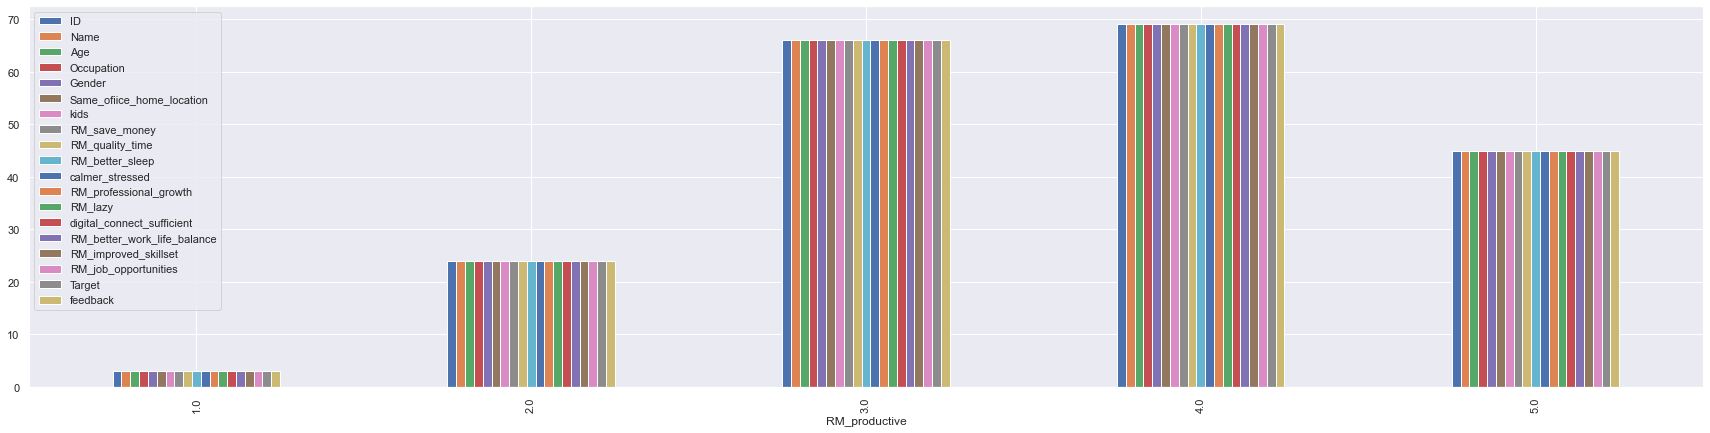

In [17]:
ax=data.groupby(["RM_productive"]).count().plot.bar(figsize=(30,7))

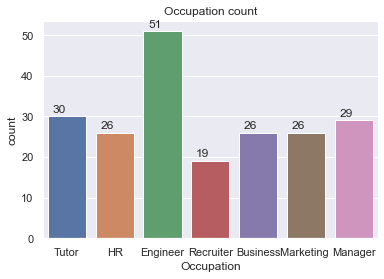

In [18]:
ax=sns.countplot(x='Occupation',data=data)
plt.title("Occupation count")
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1)) 

In [19]:
data.describe()

ID         Age  RM_professional_growth     RM_lazy  \
count  207.000000  207.000000              207.000000  207.000000   
mean   104.000000   29.666667                3.086957    3.101449   
std     59.899917    8.506993                1.089301    1.255801   
min      1.000000   21.000000                1.000000    1.000000   
25%     52.500000   25.000000                2.000000    2.000000   
50%    104.000000   26.000000                3.000000    3.000000   
75%    155.500000   29.000000                4.000000    4.000000   
max    207.000000   57.000000                5.000000    5.000000   

       RM_productive  RM_better_work_life_balance  RM_improved_skillset  \
count     207.000000                   207.000000            207.000000   
mean        3.623188                     3.043478              3.521739   
std         0.996617                     1.247539              1.004002   
min         1.000000                     1.000000              1.000000   
25%         3.000000                     2.000000              3.000000   
50%         4.000000                     3.000000              3.000000   
75%         4.000000                     4.000000              4.000000   
max         5.000000                     5.000000              5.000000   

           Target  
count  207.000000  
mean     0.405797  
std      0.492236  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

In [20]:
#checking for null values 
# Type 1
data.info() # no null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           207 non-null    float64
 1   Name                         207 non-null    object 
 2   Age                          207 non-null    float64
 3   Occupation                   207 non-null    object 
 4   Gender                       207 non-null    object 
 5   Same_ofiice_home_location    207 non-null    object 
 6   kids                         207 non-null    object 
 7   RM_save_money                207 non-null    object 
 8   RM_quality_time              207 non-null    object 
 9   RM_better_sleep              207 non-null    object 
 10  calmer_stressed              207 non-null    object 
 11  RM_professional_growth       207 non-null    float64
 12  RM_lazy                      207 non-null    float64
 13  RM_productive       

In [21]:
#checking for null values 
#Type 2
data.isnull().sum()

ID                             603
Name                           603
Age                            603
Occupation                     603
Gender                         603
Same_ofiice_home_location      603
kids                           603
RM_save_money                  603
RM_quality_time                603
RM_better_sleep                603
calmer_stressed                603
RM_professional_growth         603
RM_lazy                        603
RM_productive                  603
digital_connect_sufficient     603
RM_better_work_life_balance    603
RM_improved_skillset           603
RM_job_opportunities           603
Target                         603
feedback                         0
dtype: int64

In [22]:
#checking for category
data.nunique()

ID                             207
Name                           207
Age                             24
Occupation                       7
Gender                           2
Same_ofiice_home_location        3
kids                             2
RM_save_money                    2
RM_quality_time                  2
RM_better_sleep                  2
calmer_stressed                  2
RM_professional_growth           5
RM_lazy                          5
RM_productive                    5
digital_connect_sufficient       2
RM_better_work_life_balance      5
RM_improved_skillset             5
RM_job_opportunities             3
Target                           2
feedback                         3
dtype: int64

In [23]:
data.head(5)

ID    Name   Age Occupation  Gender Same_ofiice_home_location kids  \
0  1.0  User 1  45.0      Tutor  Female                       Yes  Yes   
1  2.0  User 2  24.0      Tutor    Male                        No   No   
2  3.0  User 3  53.0         HR  Female                       Yes  Yes   
3  4.0  User 4  26.0   Engineer  Female                       Yes   No   
4  5.0  User 5  26.0  Recruiter    Male                       Yes   No   

  RM_save_money RM_quality_time RM_better_sleep calmer_stressed  \
0           Yes             Yes             Yes          CALMER   
1            No              No              No          CALMER   
2           Yes             Yes             Yes          CALMER   
3           Yes             Yes              No        STRESSED   
4            No             Yes              No        STRESSED   

   RM_professional_growth  RM_lazy  RM_productive digital_connect_sufficient  \
0                     5.0      1.0            5.0                        Yes   
1                     2.0      2.0            2.0                         No   
2                     3.0      3.0            4.0                         No   
3                     3.0      4.0            4.0                         No   
4                     3.0      3.0            5.0                        Yes   

   RM_better_work_life_balance  RM_improved_skillset RM_job_opportunities  \
0                          5.0                   5.0                  Yes   
1                          3.0                   3.0                   No   
2                          5.0                   3.0                   No   
3                          4.0                   5.0                  Yes   
4                          4.0                   2.0                  Yes   

   Target      feedback  
0     1.0  Hybrid Model  
1     1.0  Hybrid Model  
2     1.0  Hybrid Model  
3     0.0  Hybrid Model  
4     1.0  Hybrid Model

In [24]:
data.dtypes

ID                             float64
Name                            object
Age                            float64
Occupation                      object
Gender                          object
Same_ofiice_home_location       object
kids                            object
RM_save_money                   object
RM_quality_time                 object
RM_better_sleep                 object
calmer_stressed                 object
RM_professional_growth         float64
RM_lazy                        float64
RM_productive                  float64
digital_connect_sufficient      object
RM_better_work_life_balance    float64
RM_improved_skillset           float64
RM_job_opportunities            object
Target                         float64
feedback                        object
dtype: object

In [25]:
#Get dummy values for Gender
#1. Gender
gender=pd.get_dummies(data['Gender'],drop_first=True)
gender.head()
#FEMALE=0,MALE=1

Male
0     0
1     1
2     0
3     0
4     1

In [26]:
#Get dummy values for calm_stressed
calm_stress=pd.get_dummies(data['calmer_stressed'],drop_first=True)
calm_stress.head()

STRESSED
0         0
1         0
2         0
3         1
4         1

In [27]:
data=pd.concat([data,gender,calm_stress],axis=1)
data.drop(['Gender','calmer_stressed'],axis=1,inplace=True)

In [28]:
data.head(5)

ID    Name   Age Occupation Same_ofiice_home_location kids RM_save_money  \
0  1.0  User 1  45.0      Tutor                       Yes  Yes           Yes   
1  2.0  User 2  24.0      Tutor                        No   No            No   
2  3.0  User 3  53.0         HR                       Yes  Yes           Yes   
3  4.0  User 4  26.0   Engineer                       Yes   No           Yes   
4  5.0  User 5  26.0  Recruiter                       Yes   No            No   

  RM_quality_time RM_better_sleep  RM_professional_growth  RM_lazy  \
0             Yes             Yes                     5.0      1.0   
1              No              No                     2.0      2.0   
2             Yes             Yes                     3.0      3.0   
3             Yes              No                     3.0      4.0   
4             Yes              No                     3.0      3.0   

   RM_productive digital_connect_sufficient  RM_better_work_life_balance  \
0            5.0                        Yes                          5.0   
1            2.0                         No                          3.0   
2            4.0                         No                          5.0   
3            4.0                         No                          4.0   
4            5.0                        Yes                          4.0   

   RM_improved_skillset RM_job_opportunities  Target      feedback  Male  \
0                   5.0                  Yes     1.0  Hybrid Model     0   
1                   3.0                   No     1.0  Hybrid Model     1   
2                   3.0                   No     1.0  Hybrid Model     0   
3                   5.0                  Yes     0.0  Hybrid Model     0   
4                   2.0                  Yes     1.0  Hybrid Model     1   

   STRESSED  
0         0  
1         0  
2         0  
3         1  
4         1

In [29]:
#for the YES and NO columns, map yes to 1 and No to 0
#first fetch all the categorical columns with Yes and NO
categorical =  ['Same_ofiice_home_location', 'kids', 'RM_save_money', 'RM_quality_time', 'RM_better_sleep', 'digital_connect_sufficient','RM_job_opportunities']
#write a function to change yes to 1 and no to 0
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# now replace yes and no with 1 and 0 in our dataset
data[categorical] = data[categorical].apply(binary_map)

In [30]:
data.head()

ID    Name   Age Occupation  Same_ofiice_home_location  kids  \
0  1.0  User 1  45.0      Tutor                        1.0   1.0   
1  2.0  User 2  24.0      Tutor                        0.0   0.0   
2  3.0  User 3  53.0         HR                        1.0   1.0   
3  4.0  User 4  26.0   Engineer                        1.0   0.0   
4  5.0  User 5  26.0  Recruiter                        1.0   0.0   

   RM_save_money  RM_quality_time  RM_better_sleep  RM_professional_growth  \
0            1.0              1.0              1.0                     5.0   
1            0.0              0.0              0.0                     2.0   
2            1.0              1.0              1.0                     3.0   
3            1.0              1.0              0.0                     3.0   
4            0.0              1.0              0.0                     3.0   

   RM_lazy  RM_productive  digital_connect_sufficient  \
0      1.0            5.0                         1.0   
1      2.0            2.0                         0.0   
2      3.0            4.0                         0.0   
3      4.0            4.0                         0.0   
4      3.0            5.0                         1.0   

   RM_better_work_life_balance  RM_improved_skillset  RM_job_opportunities  \
0                          5.0                   5.0                   1.0   
1                          3.0                   3.0                   0.0   
2                          5.0                   3.0                   0.0   
3                          4.0                   5.0                   1.0   
4                          4.0                   2.0                   1.0   

   Target      feedback  Male  STRESSED  
0     1.0  Hybrid Model     0         0  
1     1.0  Hybrid Model     1         0  
2     1.0  Hybrid Model     0         0  
3     0.0  Hybrid Model     0         1  
4     1.0  Hybrid Model     1         1

In [31]:
data = data.dropna(subset=['Same_ofiice_home_location','RM_job_opportunities'])
data['Same_ofiice_home_location'] = data['Same_ofiice_home_location'].astype(int)  # this column was coming as float
data['RM_job_opportunities'] = data['RM_job_opportunities'].astype(int) # this column was coming as float
data.dtypes

ID                             float64
Name                            object
Age                            float64
Occupation                      object
Same_ofiice_home_location        int32
kids                           float64
RM_save_money                  float64
RM_quality_time                float64
RM_better_sleep                float64
RM_professional_growth         float64
RM_lazy                        float64
RM_productive                  float64
digital_connect_sufficient     float64
RM_better_work_life_balance    float64
RM_improved_skillset           float64
RM_job_opportunities             int32
Target                         float64
feedback                        object
Male                             uint8
STRESSED                         uint8
dtype: object

In [32]:
#Split data into train and split data
x=data[['Age','Same_ofiice_home_location','kids','RM_save_money','RM_quality_time','RM_better_sleep','RM_professional_growth','RM_lazy','RM_productive','digital_connect_sufficient','RM_better_work_life_balance','RM_improved_skillset','RM_job_opportunities','Male','STRESSED']]
y=data['Target']

In [33]:
x.head()

Age  Same_ofiice_home_location  kids  RM_save_money  RM_quality_time  \
0  45.0                          1   1.0            1.0              1.0   
1  24.0                          0   0.0            0.0              0.0   
2  53.0                          1   1.0            1.0              1.0   
3  26.0                          1   0.0            1.0              1.0   
4  26.0                          1   0.0            0.0              1.0   

   RM_better_sleep  RM_professional_growth  RM_lazy  RM_productive  \
0              1.0                     5.0      1.0            5.0   
1              0.0                     2.0      2.0            2.0   
2              1.0                     3.0      3.0            4.0   
3              0.0                     3.0      4.0            4.0   
4              0.0                     3.0      3.0            5.0   

   digital_connect_sufficient  RM_better_work_life_balance  \
0                         1.0                          5.0   
1                         0.0                          3.0   
2                         0.0                          5.0   
3                         0.0                          4.0   
4                         1.0                          4.0   

   RM_improved_skillset  RM_job_opportunities  Male  STRESSED  
0                   5.0                     1     0         0  
1                   3.0                     0     1         0  
2                   3.0                     0     0         0  
3                   5.0                     1     0         1  
4                   2.0                     1     1         1

In [34]:
from sklearn.model_selection import train_test_split
np.random.seed(0) #so data can have same values
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=5)

In [35]:
data.head(3)

ID    Name   Age Occupation  Same_ofiice_home_location  kids  \
0  1.0  User 1  45.0      Tutor                          1   1.0   
1  2.0  User 2  24.0      Tutor                          0   0.0   
2  3.0  User 3  53.0         HR                          1   1.0   

   RM_save_money  RM_quality_time  RM_better_sleep  RM_professional_growth  \
0            1.0              1.0              1.0                     5.0   
1            0.0              0.0              0.0                     2.0   
2            1.0              1.0              1.0                     3.0   

   RM_lazy  RM_productive  digital_connect_sufficient  \
0      1.0            5.0                         1.0   
1      2.0            2.0                         0.0   
2      3.0            4.0                         0.0   

   RM_better_work_life_balance  RM_improved_skillset  RM_job_opportunities  \
0                          5.0                   5.0                     1   
1                          3.0                   3.0                     0   
2                          5.0                   3.0                     0   

   Target      feedback  Male  STRESSED  
0     1.0  Hybrid Model     0         0  
1     1.0  Hybrid Model     1         0  
2     1.0  Hybrid Model     0         0

In [36]:
#Train the model
from sklearn.linear_model import LogisticRegression

In [37]:
logm=LogisticRegression()
logm.fit(x_train,y_train)

LogisticRegression()

In [38]:
#Predict WFH or WFO using test data
predictions=logm.predict(x_test)

In [39]:
#Check the accuracy
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90        14
         1.0       0.89      0.80      0.84        10

    accuracy                           0.88        24
   macro avg       0.88      0.86      0.87        24
weighted avg       0.88      0.88      0.87        24



[[13  1]
 [ 2  8]]


In [40]:
#This shows an accuracy of 88%. 
#21 values we predicted correctly3 values were incorrect

In [41]:
cf = confusion_matrix(y_test,predictions, labels = [1,0])
cf

array([[ 8,  2],
       [ 1, 13]], dtype=int64)

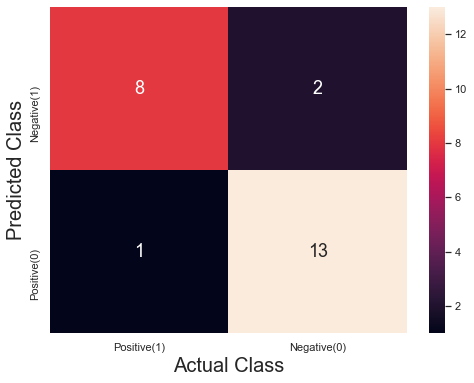

In [42]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Negative(1)","Positive(0)"]

plt.figure(figsize = (8,6))
sns.set(font_scale=1)
sns.heatmap(cf, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 18})
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [43]:
#Loading the Twitter Data
tweets = pd.read_excel('tweets.xlsx')
tweets

created_At               source  \
0    2021-10-25 23:20:00  Twitter for Android   
1    2021-10-25 23:11:00  Twitter for Android   
2    2021-10-25 22:58:00  Twitter for Android   
3    2021-10-25 21:33:00  Twitter for Android   
4    2021-10-25 21:20:00   Twitter for iPhone   
...                  ...                  ...   
4523 2021-09-24 00:00:00  Twitter for Android   
4524 2021-09-24 00:00:00  Twitter for Android   
4525 2021-09-24 00:00:00  Twitter for Android   
4526 2021-09-24 00:00:00  Twitter for Android   
4527 2021-09-24 00:00:00  Twitter for Android   

                                                   text tweettype  \
0     RT @wfhemophilia: Change the narrative around ...        RT   
1     @paulg Distributed teams is the way forward.  ...        RT   
2     RT @thenewsminute: As #workplaces move online,...        RT   
3     RT @robin_meyerhoff: The pandemic has redefine...        RT   
4     @danbrettig As if Australia tours every nation...        RT   
...                                                 ...       ...   
4523  @deviprasadv @RMantri @RNTata2000 @anandmahind...        OT   
4524  RT @Mahindra_USA: The best kind of morning com...        RT   
4525  RT @SushBorade: Outfits i wear at Work ðŸ™‹ðŸ...        RT   
4526  RT @RedChilliesEnt: Moms every five minutes wh...        RT   
4527  #crizernetworkofficial #praveensharmaofficial ...        OT   

              feedback  
0         Hybrid Model  
1         Hybrid Model  
2         Hybrid Model  
3         Hybrid Model  
4         Hybrid Model  
...                ...  
4523      Hybrid Model  
4524      Hybrid Model  
4525  Work From Office  
4526      Hybrid Model  
4527      Hybrid Model  

[4528 rows x 5 columns]

In [44]:
df.dtypes

ID                                                                   int64
Completion time                                                     object
Sector                                                              object
For how much duration you have done work from Home ( in months)    float64
Do you have required infrastructure for working from home?          object
Do you feel work from home is better than working at office?        object
Overall satisfaction with Working From Home                         object
Opinion                                                             object
dtype: object

In [45]:
def generate_frequency(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_frequency = pd.Series(word_list).value_counts()

    #Print top 5 words
    word_frequency[:5]
    
    return word_frequency

generate_frequency(tweets.text.str)

to              2546
the             2305
a               1657
RT              1643
and             1538
                ... 
fellow             1
Fantabulous        1
listedâ‰ï¸       1
adapting           1
opportunity,       1
Length: 21116, dtype: int64

In [46]:
import re

def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    
    #Fix &
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)

    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text

In [47]:
#Import list of stopwards
from wordcloud import STOPWORDS

print(STOPWORDS)

{'get', 'him', 'ourselves', 'are', 'yourself', 'she', 'an', 'into', 'otherwise', 'after', "where's", 'r', "shouldn't", 'until', "there's", "he's", 'whom', 'if', 'ought', 'am', 'few', 'com', 'there', 'himself', 'these', 'they', 'all', 'both', 'of', 'than', "you'd", 'why', 'yourselves', "doesn't", "we've", 'also', 'above', 'under', 'more', 'http', "i'm", 'k', 'it', "you've", 'is', 'were', 'being', "aren't", 'not', "they've", 'would', 'hence', "how's", 'each', "i've", 'same', "he'd", 'cannot', 'while', "i'll", 'in', 'because', 'having', "shan't", 'about', 'their', 'which', "wasn't", 'again', 'where', "what's", "i'd", 'been', 'we', 'before', "mustn't", 'themselves', 'therefore', "she's", "you're", 'from', "why's", 'else', "we're", 'our', 'hers', 'do', 'to', 'has', "didn't", 'as', "who's", 'have', 'who', "hadn't", 'should', 'them', 'over', 'me', 'but', 'with', 'yours', 'her', 'its', 'once', "we'd", "let's", 'during', "it's", "couldn't", 'own', 'here', 'some', 'this', 'does', 'did', 'what', 

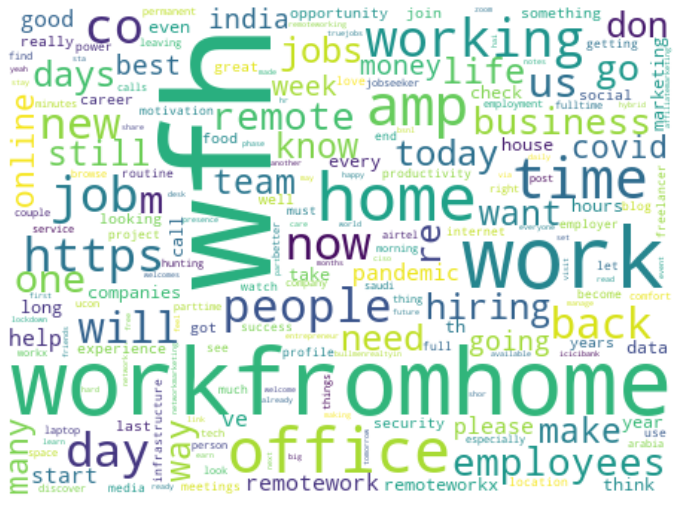

In [48]:
text = tweets.text.apply(lambda x: clean_text(x))
word_frequency = generate_frequency(text.str)*100
word_frequency = word_frequency.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_frequency)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [49]:
print(word_frequency)

wfh             281500
workfromhome    110300
work             92600
home             54800
office           48100
                 ...  
myuniverse         100
upset              100
ruralmed           100
blylymkqvk         100
rotting            100
Length: 12531, dtype: int64


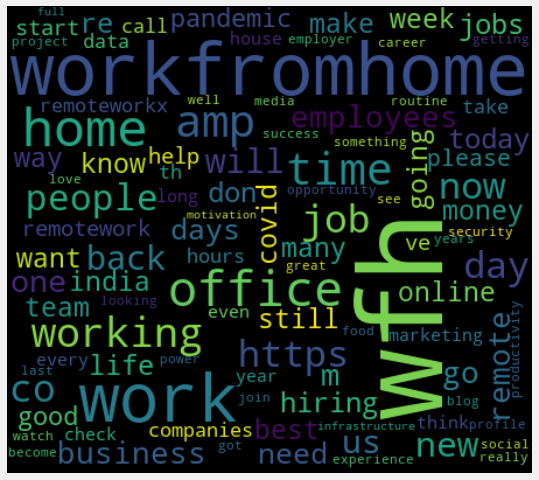

In [50]:
#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

word_frequency.index = word_frequency.index.map(str)
word_frequency.index = word_frequency.index.astype(str)
#Generate word cloud
wc = WordCloud(width=450, height=400, max_words=100, background_color='Black').generate_from_frequencies(word_frequency)
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

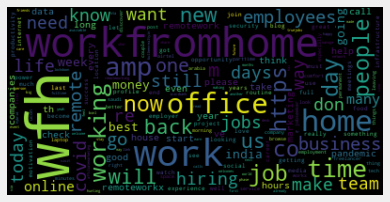

<Figure size 720x720 with 0 Axes>

In [52]:
wc = WordCloud()
#wc = WordCloud(width=450, height=400, max_words=100, background_color='Black').generate_from_frequencies(word_frequency)
#wc.generate(word_frequency)
#plt.imshow(wc, interpolation="bilinear")
#plt.axis('off')
#plt.show()
#text = df.description[0]
wordcloud = WordCloud().generate_from_frequencies(word_frequency)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(10,10))
plt.show()

In [53]:
wordcloud.to_file("first_output.png")

In [54]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
#stop.append("The")
#stop.append("A")
#stop.append("&")
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

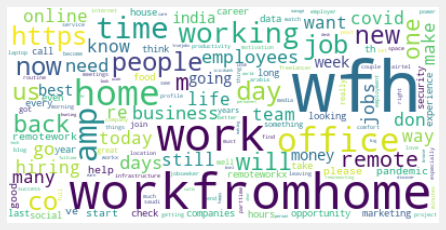

<Figure size 360x360 with 0 Axes>

In [55]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate_from_frequencies(word_frequency)
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure( figsize=(5,5), facecolor='k')
plt.show()

In [56]:
mask = np.array(Image.open("twitter1.png"))
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [57]:
def transform_zeros(val):
    if val == 0:
        return 255
    else:
        return val

In [58]:
maskable_image = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

In [59]:
for i in range(len(mask)):
    maskable_image[i] = list(map(transform_zeros, mask[i]))

In [60]:
maskable_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

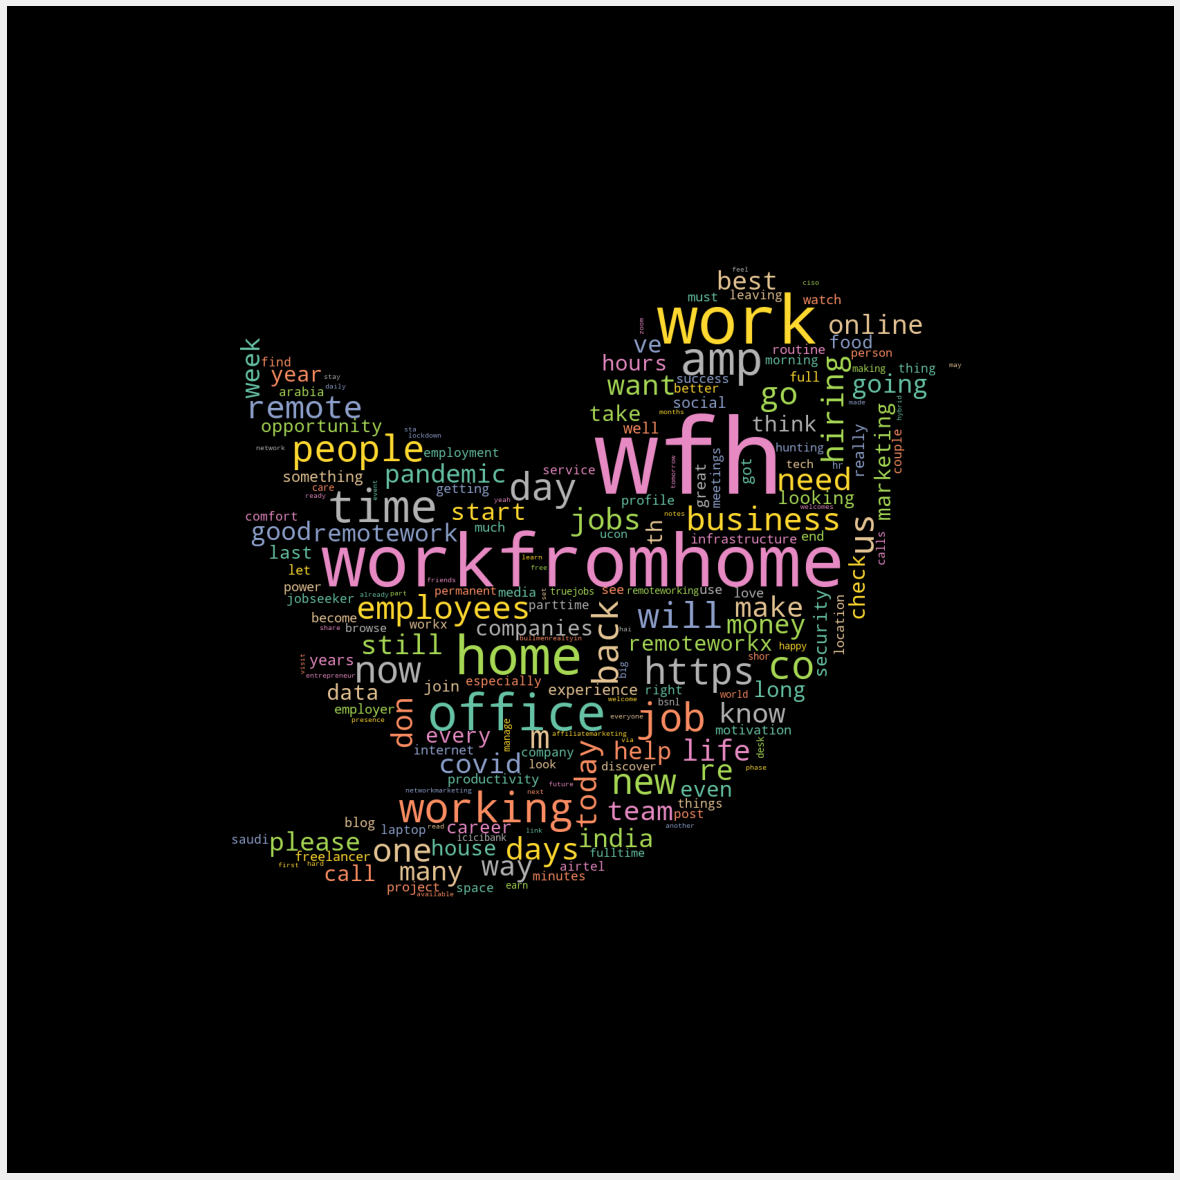

In [61]:
wordcloud = WordCloud(width = 4000, height = 3000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS, mask=maskable_image).generate_from_frequencies(word_frequency)

def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(30, 20))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
plot_cloud(wordcloud)

In [62]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=False)
from wordcloud import WordCloud
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap
import folium
from tqdm import tqdm
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.colors as mcolors
from sklearn.manifold import TSNE
from gensim.models import word2vec
import nltk

In [63]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

# Importing dataset
df=pd.read_excel('tweets.xlsx')
print("Shape of data=>",df.shape)

Shape of data=> (4528, 5)


In [64]:
df=df[['created_At','source','text','tweettype']]
print("Shape of data=>",df.shape)
df.head(5)

Shape of data=> (4528, 4)


created_At               source  \
0 2021-10-25 23:20:00  Twitter for Android   
1 2021-10-25 23:11:00  Twitter for Android   
2 2021-10-25 22:58:00  Twitter for Android   
3 2021-10-25 21:33:00  Twitter for Android   
4 2021-10-25 21:20:00   Twitter for iPhone   

                                                text tweettype  
0  RT @wfhemophilia: Change the narrative around ...        RT  
1  @paulg Distributed teams is the way forward.  ...        RT  
2  RT @thenewsminute: As #workplaces move online,...        RT  
3  RT @robin_meyerhoff: The pandemic has redefine...        RT  
4  @danbrettig As if Australia tours every nation...        RT

In [65]:
df.isnull().sum()

created_At    0
source        0
text          0
tweettype     0
dtype: int64

In [66]:
df.dropna(inplace=True)
df.isnull().sum()

created_At    0
source        0
text          0
tweettype     0
dtype: int64

In [67]:
df['source'].unique()

array(['Twitter for Android', 'Twitter for iPhone', 'Twitter Web App',
       'Twitter for iPad', 'Twitter for Mac'], dtype=object)

In [68]:
df['tweettype'].unique()

array(['RT', 'OT'], dtype=object)

In [69]:
df['created_At'].unique()

array(['2021-10-25T23:20:00.000000000', '2021-10-25T23:11:00.000000000',
       '2021-10-25T22:58:00.000000000', ...,
       '2021-09-26T00:00:00.000000000', '2021-09-25T00:00:00.000000000',
       '2021-09-24T00:00:00.000000000'], dtype='datetime64[ns]')

In [70]:
df['source']=df['source'].apply(lambda x: x.split(',,,')[0])

In [71]:
for index,text in enumerate(df['created_At'][35:40]):
  print('Created %d:\n'%(index+1),text)

Created 1:
 2021-10-25 16:42:00
Created 2:
 2021-10-25 16:38:00
Created 3:
 2021-10-25 16:38:00
Created 4:
 2021-10-25 16:31:00
Created 5:
 2021-10-25 16:31:00


In [72]:
for index,text in enumerate(df['text'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 So today in office, I chocked on my own saliva and coughed. #WFH till I learn not to chock myself Ð?¾ý
Review 2:
 RT @YaminiDiva: Friends, job opportunities for various locations
iOS,Angular,Magenta - Mumbai  (permanent work from home available)
Vue JS,ƒ?Ý
Review 3:
 RT @YaminiDiva: Friends, job opportunities for various locations
iOS,Angular,Magenta - Mumbai  (permanent work from home available)
Vue JS,ƒ?Ý
Review 4:
 @aditya_kondawar User interface is top notch,
Efficient Packaging and delivery. 
Comparison across different products but didnƒ??t find the ƒ??try it onƒ?? option like @MACcosmetics have on their website. 
On the flip side I didnƒ??t buy anything during covid due to wfh.
Review 5:
 I overhear my husband on work calls talking about "crack growth," and I wonder how engineers don't just giggle all day. 

#WFH #WorkFromHome 


In [73]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['text']=df['text'].apply(lambda x:expand_contractions(x))

In [74]:
df['cleaned']=df['text'].apply(lambda x: x.lower())

In [75]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [76]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [77]:
# Removing extra spaces
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [78]:
for index,text in enumerate(df['cleaned'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 so today in office i chocked on my own saliva and coughed wfh till i learn not to chock myself ð¾ý
Review 2:
 rt yaminidiva friends job opportunities for various locations
iosangularmagenta mumbai permanent work from home available
vue jsƒý
Review 3:
 rt yaminidiva friends job opportunities for various locations
iosangularmagenta mumbai permanent work from home available
vue jsƒý
Review 4:
 adityakondawar user interface is top notch
efficient packaging and delivery 
comparison across different products but didnƒt find the ƒtry it onƒ option like maccosmetics have on their website 
on the flip side i didnƒt buy anything during covid due to wfh
Review 5:
 i overhear my husband on work calls talking about crack growth and i wonder how engineers do not just giggle all day 

wfh workfromhome 


In [79]:
!pip install spacy

In [80]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_lg',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [81]:
df_grouped=df[['source','lemmatized']].groupby(by='source').agg(lambda x:' '.join(x))
df_grouped.head()

lemmatized
source                                                                
Twitter Web App      not want learn kannada learn bit office day ho...
Twitter for Android  rt wfhemophilia change narrative woman live bl...
Twitter for Mac      literally add wfh teammate snapchat ask add sc...
Twitter for iPad     rt ok prediction correct day time year \r\n\r\...
Twitter for iPhone   danbrettig australia tour nation country wfh c...

In [82]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

aaabbottstories   aaditsh   aaguthu       aaj  \
source                                                               
Twitter Web App             0.001296  0.001045  0.000000  0.001296   
Twitter for Android         0.000000  0.000000  0.002267  0.000000   
Twitter for Mac             0.000000  0.000000  0.000000  0.000000   

                     aajkiradha    aajtak       aap  aapnainfotech  aarum  \
source                                                                      
Twitter Web App             0.0  0.001045  0.001045       0.002592    0.0   
Twitter for Android         0.0  0.001829  0.000914       0.000000    0.0   
Twitter for Mac             0.0  0.000000  0.000000       0.000000    0.0   

                     aarupadaitech  ...     ƒùwin        ƒý  ƒƒý  ˆbreake  \
source                              ...                                     
Twitter Web App           0.000000  ...  0.000000  0.000000  0.0      0.0   
Twitter for Android       0.002267  ...  0.001133  0.000914  0.0      0.0   
Twitter for Mac           0.000000  ...  0.000000  0.000000  0.0      0.0   

                     ˆcoastal  ˆprolific   ˆâ        ˆð       ˆðÿ  ˆðÿœ  
source                                                                   
Twitter Web App      0.001296        0.0  0.0  0.000000  0.000868   0.0  
Twitter for Android  0.000000        0.0  0.0  0.001133  0.000759   0.0  
Twitter for Mac      0.000000        0.0  0.0  0.000000  0.000000   0.0  

[3 rows x 11376 columns]

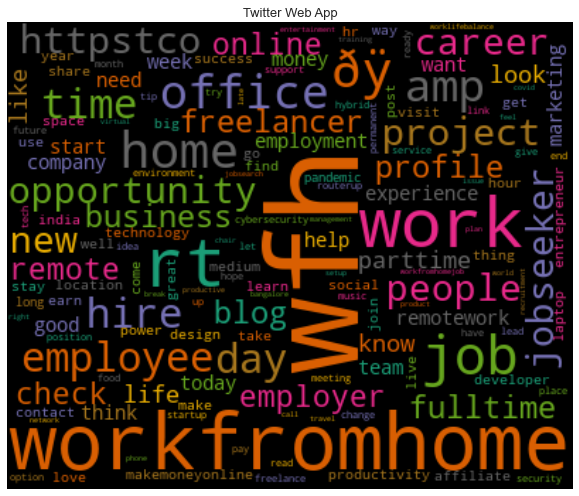

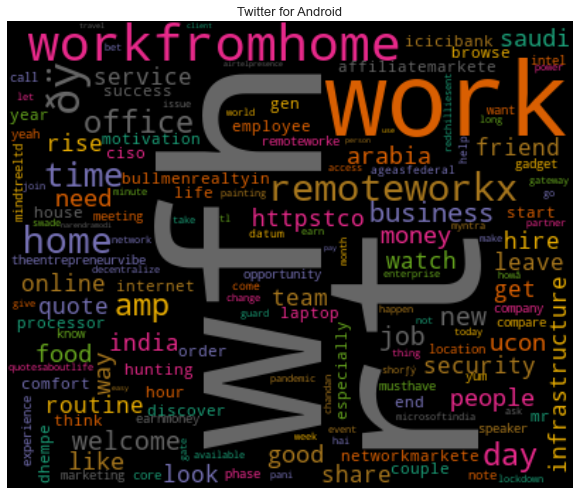

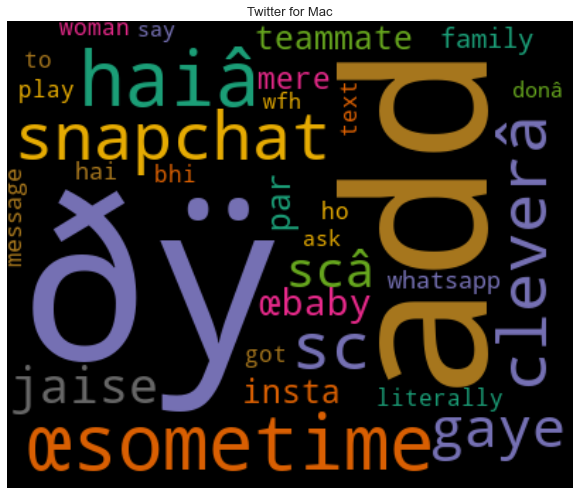

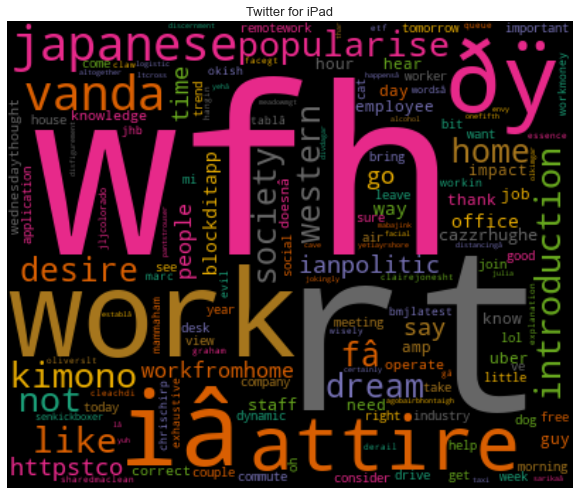

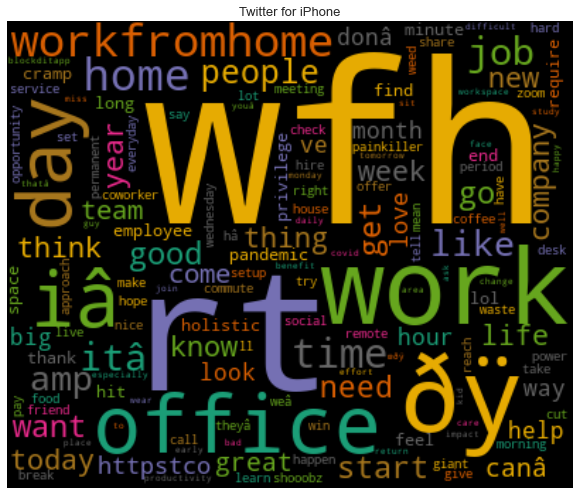

In [83]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

In [84]:
from textblob import TextBlob
df['polarity']=df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [85]:
print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1:
 RT @Zaf: We're #hiring - 
- Client Servicing Managers
- Content Writers

Excellent communication skills and an understanding of luxury areƒ?Ý
Review 2:
 RT @Zaf: We're #hiring - 
- Client Servicing Managers
- Content Writers

Excellent communication skills and an understanding of luxury areâ€¦
Review 3:
 Perfect #WFH setup does not exist 


In [86]:
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
 ðŸ§µ4/4

But it is time to get you out of the #couch at home and away from your boring #workfromhome routine.  

Read on here ðŸ‘‰ðŸ½
Review 2:
 @MSEDCL @MAHAVITARAN @NitinRaut_INC Again power outage since last 3 hours. Trying to reach to dhankawadi mseb incharge and operators but no response. Very pathetic service from dhankawadi mseb office. #WFH #poweroutage #dhankawadi #smartpune
Review 3:
 Ð?õæ4/4

But it is time to get you out of the #couch at home and away from your boring #workfromhome routine.  

Read on here Ð???Ð?«


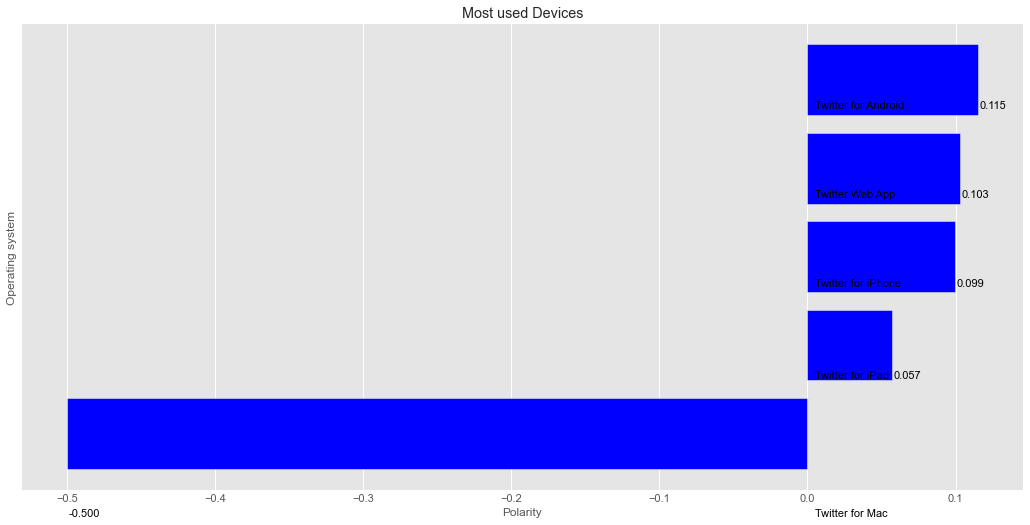

In [87]:
product_polarity_sorted=pd.DataFrame(df.groupby('source')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Operating system')
plt.title('Most used Devices')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='blue',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='Black')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='Black')
  
plt.yticks([])
plt.show()

In [88]:
#Loading the Twitter Data
tweets = pd.read_excel('tweets.xlsx')
tweets

created_At               source  \
0    2021-10-25 23:20:00  Twitter for Android   
1    2021-10-25 23:11:00  Twitter for Android   
2    2021-10-25 22:58:00  Twitter for Android   
3    2021-10-25 21:33:00  Twitter for Android   
4    2021-10-25 21:20:00   Twitter for iPhone   
...                  ...                  ...   
4523 2021-09-24 00:00:00  Twitter for Android   
4524 2021-09-24 00:00:00  Twitter for Android   
4525 2021-09-24 00:00:00  Twitter for Android   
4526 2021-09-24 00:00:00  Twitter for Android   
4527 2021-09-24 00:00:00  Twitter for Android   

                                                   text tweettype  \
0     RT @wfhemophilia: Change the narrative around ...        RT   
1     @paulg Distributed teams is the way forward.  ...        RT   
2     RT @thenewsminute: As #workplaces move online,...        RT   
3     RT @robin_meyerhoff: The pandemic has redefine...        RT   
4     @danbrettig As if Australia tours every nation...        RT   
...                                                 ...       ...   
4523  @deviprasadv @RMantri @RNTata2000 @anandmahind...        OT   
4524  RT @Mahindra_USA: The best kind of morning com...        RT   
4525  RT @SushBorade: Outfits i wear at Work ðŸ™‹ðŸ...        RT   
4526  RT @RedChilliesEnt: Moms every five minutes wh...        RT   
4527  #crizernetworkofficial #praveensharmaofficial ...        OT   

              feedback  
0         Hybrid Model  
1         Hybrid Model  
2         Hybrid Model  
3         Hybrid Model  
4         Hybrid Model  
...                ...  
4523      Hybrid Model  
4524      Hybrid Model  
4525  Work From Office  
4526      Hybrid Model  
4527      Hybrid Model  

[4528 rows x 5 columns]

In [89]:
df.dtypes

created_At    datetime64[ns]
source                object
text                  object
tweettype             object
cleaned               object
lemmatized            object
polarity             float64
dtype: object

In [90]:
#Performing Data Cleansing
words = set(nltk.corpus.stopwords.words('english'))
tweet = []
for i in range(0,len(tweets)):
 string = tweets.iloc[i,2]
 string = re.sub(r"http\S+", "", string) #Removes Hyperlink
 string = re.sub('@[^\s]+','',string) #Removes Usernames
 string = re.sub('#[^\s]+','',string) #Removes Hashtags
 tweet.append(string.strip("[").strip("]"))
new_tweet = pd.DataFrame(list(zip(tweet)), columns = ['text'])
new_tweet

text
0     RT  Change the narrative around women living w...
1      Distributed teams is the way forward.  Access...
2     RT  As  move online, how does the POSH Act wor...
3     RT  The pandemic has redefined how we work. To...
4      As if Australia tours every nation.. Only cou...
...                                                 ...
4523       Agree,  yet pl tell me is it work place, ...
4524            RT  The best kind of morning commute   
4525  RT  Outfits i wear at Work ðŸ™‹ðŸ»â€â™€ï¸\r...
4526  RT  Moms every five minutes when you're workin...
4527             \r\nðŸ‘‡Click Below to Start ðŸ‘‡\r\n 

[4528 rows x 1 columns]

In [91]:
#Checking the Polarity
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()
sentiment_dict = []
for i in range(0,len(new_tweet)):
 sentiment_dict.append(sent.polarity_scores(new_tweet.iloc[i,0]))
positive = []
neutral = []
negative = []
compound = []
for item in sentiment_dict:
 positive.append(item['pos']*100)
 neutral.append(item['neu']*100)
 negative.append(item['neg']*100)
 compound.append(item['compound']*100)
sentiment_df = pd.DataFrame(list(zip(positive, neutral, negative, compound)), columns = ['Positive', 'Neutral', 'Negative', 'Compound'])
 
new_tweet['Positive'] = sentiment_df['Positive']
new_tweet['Negative'] = sentiment_df['Negative']
new_tweet['Neutral'] = sentiment_df['Neutral']
new_tweet['Compound'] = sentiment_df['Compound']

new_tweet

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AZIZ\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AZIZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


text  Positive  Negative  \
0     RT  Change the narrative around women living w...      14.6       0.0   
1      Distributed teams is the way forward.  Access...      18.9       0.0   
2     RT  As  move online, how does the POSH Act wor...       0.0       0.0   
3     RT  The pandemic has redefined how we work. To...       9.1       0.0   
4      As if Australia tours every nation.. Only cou...       0.0      19.7   
...                                                 ...       ...       ...   
4523       Agree,  yet pl tell me is it work place, ...      11.3       0.0   
4524            RT  The best kind of morning commute         41.2       0.0   
4525  RT  Outfits i wear at Work ðŸ™‹ðŸ»â€â™€ï¸\r...       0.0       0.0   
4526  RT  Moms every five minutes when you're workin...       0.0       0.0   
4527             \r\nðŸ‘‡Click Below to Start ðŸ‘‡\r\n        0.0       0.0   

      Neutral  Compound  
0        85.4     44.04  
1        81.1     84.42  
2       100.0      0.00  
3        90.9     12.80  
4        80.3    -40.19  
...       ...       ...  
4523     88.7     69.66  
4524     58.8     63.69  
4525    100.0      0.00  
4526    100.0      0.00  
4527    100.0      0.00  

[4528 rows x 5 columns]

In [92]:
#Removing all the neutral comments
wf_tweet = new_tweet.loc[new_tweet['Neutral'] != 100].reset_index()
wf_tweet = wf_tweet.drop('index', axis = 1)
wf_tweet

text  Positive  Negative  \
0     RT  Change the narrative around women living w...      14.6       0.0   
1      Distributed teams is the way forward.  Access...      18.9       0.0   
2     RT  The pandemic has redefined how we work. To...       9.1       0.0   
3      As if Australia tours every nation.. Only cou...       0.0      19.7   
4     Haha. Yes, in this WFH world--stand up meeting...      32.2       0.0   
...                                                 ...       ...       ...   
3176   .\r\nWorld best  \r\nTo know more \r\nWhtasap...      41.2       0.0   
3177  Really miss working from office on a Friday:\r...      16.5      26.4   
3178            Earn Bitcoins Free Mining \r\n\r\n           52.4       0.0   
3179       Agree,  yet pl tell me is it work place, ...      11.3       0.0   
3180            RT  The best kind of morning commute         41.2       0.0   

      Neutral  Compound  
0        85.4     44.04  
1        81.1     84.42  
2        90.9     12.80  
3        80.3    -40.19  
4        67.8     69.08  
...       ...       ...  
3176     58.8     63.69  
3177     57.1    -31.49  
3178     47.6     51.06  
3179     88.7     69.66  
3180     58.8     63.69  

[3181 rows x 5 columns]

In [93]:
#Classifying Tweets as positive or Negative
wf_tweet['Status'] = wf_tweet['Compound'].apply(lambda c: 'neg' if c >=0 else 'pos')
#wf_tweet['Status'] = wf_tweet['Compound'].apply(lambda c: 'neg' if int(x)>80 else 0)
wf_tweet_demo=wf_tweet
wf_tweet_demo

text  Positive  Negative  \
0     RT  Change the narrative around women living w...      14.6       0.0   
1      Distributed teams is the way forward.  Access...      18.9       0.0   
2     RT  The pandemic has redefined how we work. To...       9.1       0.0   
3      As if Australia tours every nation.. Only cou...       0.0      19.7   
4     Haha. Yes, in this WFH world--stand up meeting...      32.2       0.0   
...                                                 ...       ...       ...   
3176   .\r\nWorld best  \r\nTo know more \r\nWhtasap...      41.2       0.0   
3177  Really miss working from office on a Friday:\r...      16.5      26.4   
3178            Earn Bitcoins Free Mining \r\n\r\n           52.4       0.0   
3179       Agree,  yet pl tell me is it work place, ...      11.3       0.0   
3180            RT  The best kind of morning commute         41.2       0.0   

      Neutral  Compound Status  
0        85.4     44.04    neg  
1        81.1     84.42    neg  
2        90.9     12.80    neg  
3        80.3    -40.19    pos  
4        67.8     69.08    neg  
...       ...       ...    ...  
3176     58.8     63.69    neg  
3177     57.1    -31.49    pos  
3178     47.6     51.06    neg  
3179     88.7     69.66    neg  
3180     58.8     63.69    neg  

[3181 rows x 6 columns]

In [94]:
pip install openpyxl

In [95]:
wf_tweet.to_csv('Output.csv')

Votes
Status       
neg      2394
pos       787

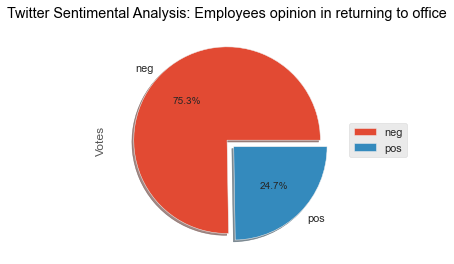

In [96]:
#Performing Grouping and Aggregation Operation based on Sentimental Analysis
frequency_df = wf_tweet_demo[["Status"]]
frequency_df['Votes'] =1
grouped_frequency_df = frequency_df.groupby(['Status'])[['Votes']].sum() #sum function
display(grouped_frequency_df)

grouped_frequency_df.plot(kind='pie', y='Votes', autopct='%1.1f%%', explode=(0, 0.1), shadow=True, startangle=0)
plt.title('Twitter Sentimental Analysis: Employees opinion in returning to office', color='black')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Twitter Data Summary


Twitter Sentimental Analysis: Employees opinion in returning to office
No     2394
Yes     787
Name: Votes, dtype: int64

Survey Data Summary


Opinion
No     374
Yes    436
Name: Votes, dtype: int64

Consolidated Summary


final opinion
No     2768
Yes    1223
Name: Votes, dtype: int64

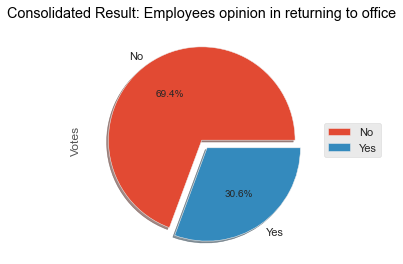

In [97]:
#Consolidating Results of Twitter Data and Survey Data
grouped_frequency_df=grouped_frequency_df.rename(index={'pos': 'Yes','neg': 'No'})
grouped_frequency_df=grouped_frequency_df.rename_axis('Twitter Sentimental Analysis: Employees opinion in returning to office')
print("Twitter Data Summary")
display(grouped_frequency_df["Votes"])
print("Survey Data Summary")
display(group_data_2['Votes'])

final=grouped_frequency_df["Votes"]+group_data_2['Votes']
print("Consolidated Summary")
final.index.names = ['final opinion']
display(final)

final.plot(kind='pie', y='Votes', autopct='%1.1f%%', explode=(0, 0.1), shadow=True, startangle=0)
plt.title('Consolidated Result: Employees opinion in returning to office', color='black')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Text(0, 0.5, 'tweets')

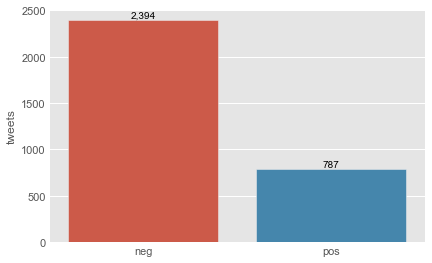

In [98]:
train_df=wf_tweet
x=train_df.Status.value_counts()
ax = sns.barplot(x.index,x)
for i, v in enumerate(x.iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), ha='center', va ='bottom', fontsize=10, color='black', rotation=0)
plt.gca().set_ylabel('tweets')

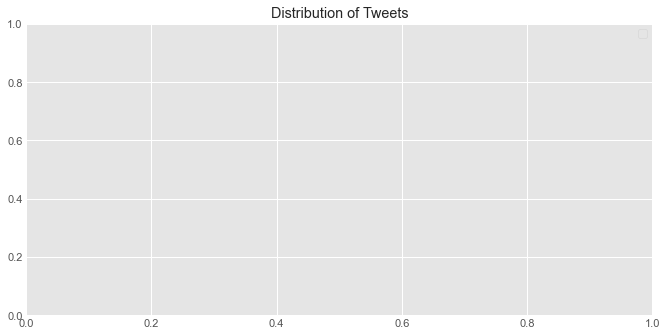

In [99]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(train_df[train_df['Status']=='Neutral']['text'].str.len())
sns.kdeplot(train_df[train_df['Status']=='Positive']['text'].str.len())
plt.title("Distribution of Tweets")
ax.legend(labels=["Neutral","Positive"])

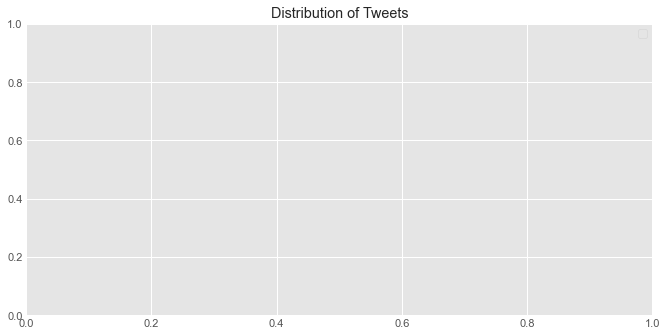

In [100]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(train_df[train_df['Status']=='Neutral']['text'].str.split().map(lambda x: len(x)))
sns.kdeplot(train_df[train_df['Status']=='Positive']['text'].str.split().map(lambda x: len(x)))
sns.kdeplot(train_df[train_df['Status']=='negative']['text'].str.split().map(lambda x: len(x)))
plt.title("Distribution of Tweets")
ax.legend(labels=["Neutral","Positive"])

In [101]:
train_df.head()

text  Positive  Negative  \
0  RT  Change the narrative around women living w...      14.6       0.0   
1   Distributed teams is the way forward.  Access...      18.9       0.0   
2  RT  The pandemic has redefined how we work. To...       9.1       0.0   
3   As if Australia tours every nation.. Only cou...       0.0      19.7   
4  Haha. Yes, in this WFH world--stand up meeting...      32.2       0.0   

   Neutral  Compound Status  
0     85.4     44.04    neg  
1     81.1     84.42    neg  
2     90.9     12.80    neg  
3     80.3    -40.19    pos  
4     67.8     69.08    neg

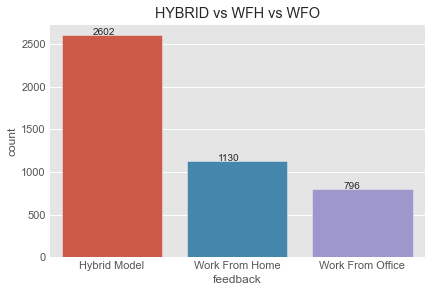

In [102]:
#WFH/remote work for sure -1
#I'd rather go back to office -0
ax=sns.countplot(x='feedback',data=tweets)
plt.title('HYBRID vs WFH vs WFO')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+3)) 

In [103]:
!pip install sklearn

In [104]:
data = pd.read_csv('output.csv')
data.head()

Unnamed: 0                                               text  Positive  \
0           0  RT  Change the narrative around women living w...      14.6   
1           1   Distributed teams is the way forward.  Access...      18.9   
2           2  RT  The pandemic has redefined how we work. To...       9.1   
3           3   As if Australia tours every nation.. Only cou...       0.0   
4           4  Haha. Yes, in this WFH world--stand up meeting...      32.2   

   Negative  Neutral  Compound Status  
0       0.0     85.4     44.04    neg  
1       0.0     81.1     84.42    neg  
2       0.0     90.9     12.80    neg  
3      19.7     80.3    -40.19    pos  
4       0.0     67.8     69.08    neg

In [105]:
#for the YES and NO columns, map yes to 1 and No to 0
#first fetch all the categorical columns with Yes and NO
categorical =  ['Status']
#write a function to change yes to 1 and no to 0
def binary_map(x):
    return x.map({'pos': 1, "neg": 0})

# now replace yes and no with 1 and 0 in our dataset
data[categorical] = data[categorical].apply(binary_map)
data.head()

Unnamed: 0                                               text  Positive  \
0           0  RT  Change the narrative around women living w...      14.6   
1           1   Distributed teams is the way forward.  Access...      18.9   
2           2  RT  The pandemic has redefined how we work. To...       9.1   
3           3   As if Australia tours every nation.. Only cou...       0.0   
4           4  Haha. Yes, in this WFH world--stand up meeting...      32.2   

   Negative  Neutral  Compound  Status  
0       0.0     85.4     44.04       0  
1       0.0     81.1     84.42       0  
2       0.0     90.9     12.80       0  
3      19.7     80.3    -40.19       1  
4       0.0     67.8     69.08       0

In [106]:
#split dataset in features and target variable
feature_cols = ['Positive', 'Neutral']
X = data[feature_cols] # Features
y = data.Status # Target variable

In [107]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [108]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
#
y_pred=logreg.predict(X_test)

In [109]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[585,   4],
       [  3, 204]], dtype=int64)

In [110]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

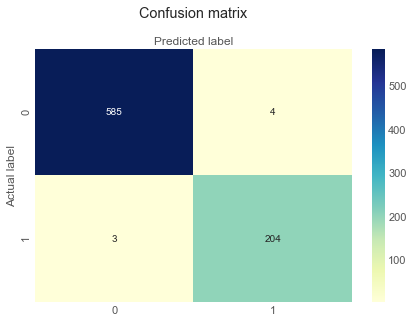

In [111]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [112]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9912060301507538
Precision: 0.9807692307692307
Recall: 0.9855072463768116


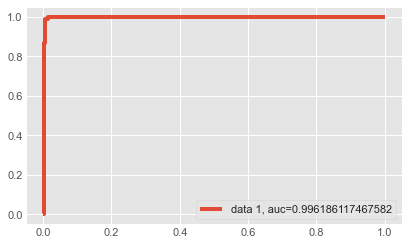

In [113]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [114]:
data = data.dropna(subset=['Positive','Negative','Neutral','Compound'])
data['Positive'] = data['Positive'].astype(int)  # this column was coming as float
data['Negative'] = data['Negative'].astype(int) # this column was coming as float
data['Compound'] = data['Compound'].astype(int)  # this column was coming as float
data['Neutral'] = data['Neutral'].astype(int) # this column was coming as float
data.dtypes

Unnamed: 0     int64
text          object
Positive       int32
Negative       int32
Neutral        int32
Compound       int32
Status         int64
dtype: object

In [115]:
#Split data into train and split data
X1=data[['Positive','Negative','Neutral','Compound']]
Y1=data['Status']

In [116]:
X1.head()

Positive  Negative  Neutral  Compound
0        14         0       85        44
1        18         0       81        84
2         9         0       90        12
3         0        19       80       -40
4        32         0       67        69

In [117]:
Y1.head()

0    0
1    0
2    0
3    1
4    0
Name: Status, dtype: int64

In [118]:
from sklearn.model_selection import train_test_split
np.random.seed(0) #so data can have same values
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,train_size=0.8,test_size=0.2,random_state=5)

In [119]:
data.head(3)

Unnamed: 0                                               text  Positive  \
0           0  RT  Change the narrative around women living w...        14   
1           1   Distributed teams is the way forward.  Access...        18   
2           2  RT  The pandemic has redefined how we work. To...         9   

   Negative  Neutral  Compound  Status  
0         0       85        44       0  
1         0       81        84       0  
2         0       90        12       0

In [120]:
#Train the model
from sklearn.linear_model import LogisticRegression

In [121]:
logm=LogisticRegression()
logm.fit(X1_train,Y1_train)

LogisticRegression()

In [122]:
#Predict WFH or WFO using test data
predictions=logm.predict(X1_test)

In [123]:
#Check the accuracy
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y1_test,predictions))
print("\n")
print(confusion_matrix(Y1_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       479
           1       1.00      1.00      1.00       158

    accuracy                           1.00       637
   macro avg       1.00      1.00      1.00       637
weighted avg       1.00      1.00      1.00       637



[[479   0]
 [  0 158]]


In [124]:
cf = confusion_matrix(Y1_test,predictions, labels = [1,0])
cf

array([[158,   0],
       [  0, 479]], dtype=int64)

In [125]:
!pip install xgboost

In [126]:
# Compare Algorithms
import pandas
import os
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


 

In [127]:
# load dataset
data = pd.read_csv('output.csv')
data.head()
names = ['Positive','Negative','Neutral','Compound', 'Status']

In [128]:
#for the YES and NO columns, map yes to 1 and No to 0
#first fetch all the categorical columns with Yes and NO
categorical =  ['Status']
#write a function to change yes to 1 and no to 0
def binary_map(x):
    return x.map({'pos': 1, "neg": 0})

# now replace yes and no with 1 and 0 in our dataset
data[categorical] = data[categorical].apply(binary_map)
data.head()

Unnamed: 0                                               text  Positive  \
0           0  RT  Change the narrative around women living w...      14.6   
1           1   Distributed teams is the way forward.  Access...      18.9   
2           2  RT  The pandemic has redefined how we work. To...       9.1   
3           3   As if Australia tours every nation.. Only cou...       0.0   
4           4  Haha. Yes, in this WFH world--stand up meeting...      32.2   

   Negative  Neutral  Compound  Status  
0       0.0     85.4     44.04       0  
1       0.0     81.1     84.42       0  
2       0.0     90.9     12.80       0  
3      19.7     80.3    -40.19       1  
4       0.0     67.8     69.08       0

In [129]:
#Split data into train and split data
X1=data[['Positive','Negative','Neutral']]
Y1=data['Status']

In [130]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('BC', BaggingClassifier()))
models.append(('GBC', GradientBoostingClassifier()))              

LR: 0.988681 (0.004709)
LDA: 0.956926 (0.012827)
KNN: 0.986166 (0.007062)
CART: 0.981135 (0.011341)
NB: 0.972647 (0.010439)
SVM: 0.991826 (0.003503)
RFC: 0.985852 (0.007608)
BC: 0.987110 (0.009377)
GBC: 0.983651 (0.008179)


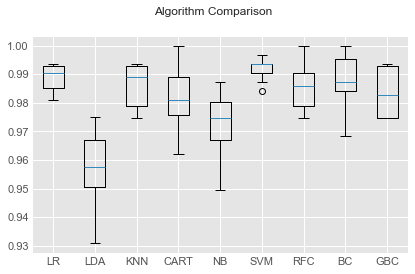

In [131]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X1, Y1, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string, re
import nltk
import wordcloud
from IPython.display import display
import fileupload
import io
import sys
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('stopwords')
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AZIZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
sns.set()
modelling = False
subsampling = False # For speed up the iteration of development

In [4]:
# load dataset
df = pd.read_excel('sample.xlsx')
df.head()

type              source  \
0  replied_to  Twitter for iPhone   
1         NaN           TweetDeck   
2   retweeted      Grassroots DNC   
3         NaN     Twitter Web App   
4         NaN           TweetDeck   

                                                text      feedback Status  
0  @vijayshekhar @easydesq will help you look for...  Hybrid Model    neg  
1  “The secret of getting ahead is getting starte...  Hybrid Model    neg  
2  RT @_mediaspace: Hello hybrid style! Our first...  Hybrid Model    neg  
3  Hello hybrid style! Our first day back to the ...  Hybrid Model    pos  
4  If your business is #movingoffice, we can make...  Hybrid Model    neg

In [5]:
#for the YES and NO columns, map yes to 1 and No to 0
#first fetch all the categorical columns with Yes and NO
categorical =  ['Status']
#write a function to change yes to 1 and no to 0
def binary_map(x):
    return x.map({'pos': 1, "neg": 0})

# now replace yes and no with 1 and 0 in our dataset
df[categorical] = df[categorical].apply(binary_map)
df.head()

type              source  \
0  replied_to  Twitter for iPhone   
1         NaN           TweetDeck   
2   retweeted      Grassroots DNC   
3         NaN     Twitter Web App   
4         NaN           TweetDeck   

                                                text      feedback  Status  
0  @vijayshekhar @easydesq will help you look for...  Hybrid Model     0.0  
1  “The secret of getting ahead is getting starte...  Hybrid Model     0.0  
2  RT @_mediaspace: Hello hybrid style! Our first...  Hybrid Model     0.0  
3  Hello hybrid style! Our first day back to the ...  Hybrid Model     1.0  
4  If your business is #movingoffice, we can make...  Hybrid Model     0.0

In [8]:
# load dataset
emoji_sent_df = pd.read_csv('Emoji_Sentiment_Data_v1.0.csv')
emoji_sent_df.head(10)

Emoji Unicode codepoint  Occurrences  Position  Negative  Neutral  Positive  \
0     😂           0x1f602        14622  0.805101      3614     4163      6845   
1     ❤            0x2764         8050  0.746943       355     1334      6361   
2     ♥            0x2665         7144  0.753806       252     1942      4950   
3     😍           0x1f60d         6359  0.765292       329     1390      4640   
4     😭           0x1f62d         5526  0.803352      2412     1218      1896   
5     😘           0x1f618         3648  0.854480       193      702      2753   
6     😊           0x1f60a         3186  0.813302       189      754      2243   
7     👌           0x1f44c         2925  0.805223       274      728      1923   
8     💕           0x1f495         2400  0.765726        99      683      1618   
9     👏           0x1f44f         2336  0.787130       243      634      1459   

                          Unicode name                          Unicode block  
0               FACE WITH TEARS OF JOY                              Emoticons  
1                    HEAVY BLACK HEART                               Dingbats  
2                     BLACK HEART SUIT                  Miscellaneous Symbols  
3  SMILING FACE WITH HEART-SHAPED EYES                              Emoticons  
4                   LOUDLY CRYING FACE                              Emoticons  
5                 FACE THROWING A KISS                              Emoticons  
6       SMILING FACE WITH SMILING EYES                              Emoticons  
7                         OK HAND SIGN  Miscellaneous Symbols and Pictographs  
8                           TWO HEARTS  Miscellaneous Symbols and Pictographs  
9                  CLAPPING HANDS SIGN  Miscellaneous Symbols and Pictographs

In [137]:
emoji_sent_df.head()
emoji_sent_df.dtypes

Emoji                 object
Unicode codepoint     object
Occurrences            int64
Position             float64
Negative               int64
Neutral                int64
Positive               int64
Unicode name          object
Unicode block         object
dtype: object

In [138]:
df.drop_duplicates(inplace=True)
df.shape

(1088, 5)

In [139]:
df.isnull().sum(axis = 0)

type        623
source        0
text          0
feedback      1
Status        1
dtype: int64

In [140]:
f'[{string.punctuation}]' # Just to check what symbols are included
df['text']=df['text'].str.replace(f'[{string.punctuation}]','') # Removing punctuation symbols (Maybe exclamations of questions marks have any impact?)
df['text']=df['text'].str.replace('[‘’“”…]', '') # Removing more potential weird charactersa

In [141]:
df['text'].str.len().mean()
df['text'].str.len().std()
df['text'].str.len().quantile(q = [0,0.25,0.5,0.75,0.9,0.95,0.99,0.999,0.9999,1])

0.0000     22.0000
0.2500    127.0000
0.5000    135.0000
0.7500    230.0000
0.9000    270.0000
0.9500    277.0000
0.9900    285.0000
0.9990    332.3900
0.9999    335.8913
1.0000    336.0000
Name: text, dtype: float64

In [142]:
    df = df[df['text'].str.len() < 500]
    df.shape

(1088, 5)

<AxesSubplot:xlabel='type', ylabel='count'>

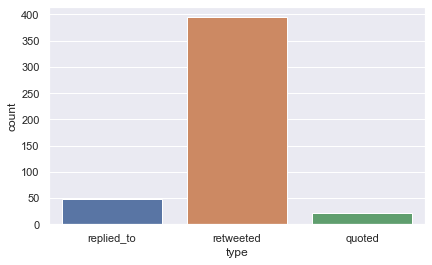

In [143]:
sns.countplot(x = 'type', data = df)

In [144]:
    df['contains_numbers'] = df['text'].str.contains('\s\d+\s',regex=True) # Pure number words
    df['text']=df['text'].str.replace('[0-9]',' ',regex=True) # Remove all numbers (even the ones between letters)
    df['contains_numbers'].mean()

0.19944852941176472

In [145]:
    pd.crosstab(df['contains_numbers'],df['Status'])

Status            0.0  1.0
contains_numbers          
False             649  222
True              169   47

In [146]:
    #def perc_capital_letters(text): return sum(1 for c in text if c.isupper())/len(text)
    df['perc_capital'] = df['text'].apply(lambda text: sum(1 for c in text if c.isupper())/(len(text)+1))

In [147]:
df['perc_capital'].describe()

count    1088.000000
mean        0.088326
std         0.052216
min         0.000000
25%         0.051095
50%         0.078193
75%         0.116026
max         0.505747
Name: perc_capital, dtype: float64

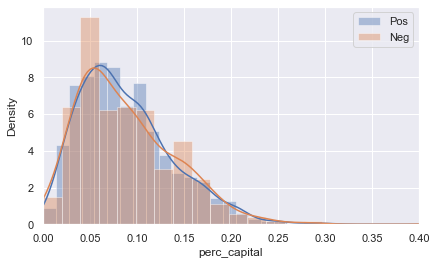

In [148]:
if not modelling:
    sns.distplot(df[(df['Status'] == 0)]['perc_capital'].dropna(),label='Pos')
    sns.distplot(df[(df['Status'] == 1)]['perc_capital'].dropna(),label='Neg')
    plt.legend()
    plt.xlim([0,0.4])
    plt.show()

In [149]:
    df['text'] = df['text'].str.lower().str.strip() # Lower case and striping (Maybe capital letters have any predictive impact?f)

In [150]:
    df['text']

0       vijayshekhar easydesq will help you look for a...
1       the secret of getting ahead is getting started...
2       rt mediaspace hello hybrid style our first day...
3       hello hybrid style our first day back to the o...
4       if your business is movingoffice we can make t...
                              ...                        
1195    does working from home mean more people will r...
1196    future focused the      cybersecurity landscap...
1197    multiple times power being snapped today in am...
1198    rt techjobapp 📣 jobalert\n\n🧑‍💻 senior in angu...
1199    rt mymoneytips     daily formula httpstcoahsms...
Name: text, Length: 1088, dtype: object

In [151]:
df['char_length'] = df['text'].str.len()
df['char_length_norm'] = df['char_length']/df['char_length'].max()

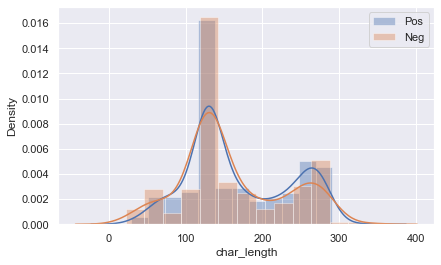

In [152]:
plot1 = sns.distplot(df[(df['Status'] == 0)]['char_length'].dropna(),label='Pos')
plot2 = sns.distplot(df[(df['Status'] == 1)]['char_length'].dropna(),label='Neg')
    #plot1.set(xscale="log")
    #plot2.set(xscale="log")
plt.legend()
plt.show()

In [153]:
emoji_sent_df.head()
emoji_sent_df.dtypes

Emoji                 object
Unicode codepoint     object
Occurrences            int64
Position             float64
Negative               int64
Neutral                int64
Positive               int64
Unicode name          object
Unicode block         object
dtype: object

In [154]:
if not modelling:
    def emoji_sent(text):
        negative = 0
        neutral = 0
        positive = 0
        position = -1
        has = 0
        total = 0
        for emoji in emoji_sent_df['Emoji']:
            n_times = text.count(emoji)
            if n_times > 0:
                has += n_times
                position += n_times*emoji_sent_df[emoji_sent_df['Emoji']==emoji]['Position'].values[0]
                negative += n_times*emoji_sent_df[emoji_sent_df['Emoji']==emoji]['Negative'].values[0]/10000
                neutral += n_times*emoji_sent_df[emoji_sent_df['Emoji']==emoji]['Neutral'].values[0]/10000
                positive += n_times*emoji_sent_df[emoji_sent_df['Emoji']==emoji]['Positive'].values[0]/10000
                total += n_times
        if total != 0:
            negative = negative/total
            neutral = neutral/total
            positive = positive/total
            position = (position +1)/total
        return pd.Series([has,negative,neutral,positive,position])
    df[['has_emoji','emoji_neg_sent','emoji_neut_sent','emoji_pos_sent','emoji_position']]=df['text'].apply(emoji_sent)

In [155]:
df.head(300)

type               source  \
0    replied_to   Twitter for iPhone   
1           NaN            TweetDeck   
2     retweeted       Grassroots DNC   
3           NaN      Twitter Web App   
4           NaN            TweetDeck   
..          ...                  ...   
317   retweeted  Twitter for Android   
320   retweeted      Twitter Web App   
324   retweeted     Twitter for iPad   
326   retweeted      Twitter Web App   
331   retweeted      Twitter Web App   

                                                  text        feedback  \
0    vijayshekhar easydesq will help you look for a...    Hybrid Model   
1    the secret of getting ahead is getting started...    Hybrid Model   
2    rt mediaspace hello hybrid style our first day...    Hybrid Model   
3    hello hybrid style our first day back to the o...    Hybrid Model   
4    if your business is movingoffice we can make t...    Hybrid Model   
..                                                 ...             ...   
317  rt lizfranczak congrats to the governor backto...  Work From Home   
320  rt lizfranczak congrats to the governor backto...  Work From Home   
324  rt lizfranczak congrats to the governor backto...  Work From Home   
326  rt lizfranczak congrats to the governor backto...  Work From Home   
331  rt lizfranczak congrats to the governor backto...    Hybrid Model   

     Status  contains_numbers  perc_capital  char_length  char_length_norm  \
0       0.0              True      0.032787          243          0.723214   
1       0.0             False      0.102564          271          0.806548   
2       0.0             False      0.037037          134          0.398810   
3       1.0             False      0.062284          288          0.857143   
4       0.0             False      0.036364          273          0.812500   
..      ...               ...           ...          ...               ...   
317     1.0             False      0.100000           69          0.205357   
320     0.0             False      0.100000           69          0.205357   
324     0.0             False      0.100000           69          0.205357   
326     1.0             False      0.100000           69          0.205357   
331     0.0             False      0.100000           69          0.205357   

     has_emoji  emoji_neg_sent  emoji_neut_sent  emoji_pos_sent  \
0          0.0          0.0000           0.0000          0.0000   
1          0.0          0.0000           0.0000          0.0000   
2          1.0          0.0037           0.0114          0.0288   
3          1.0          0.0037           0.0114          0.0288   
4          0.0          0.0000           0.0000          0.0000   
..         ...             ...              ...             ...   
317        0.0          0.0000           0.0000          0.0000   
320        0.0          0.0000           0.0000          0.0000   
324        0.0          0.0000           0.0000          0.0000   
326        0.0          0.0000           0.0000          0.0000   
331        0.0          0.0000           0.0000          0.0000   

     emoji_position  
0         -1.000000  
1         -1.000000  
2          0.786285  
3          0.786285  
4         -1.000000  
..              ...  
317       -1.000000  
320       -1.000000  
324       -1.000000  
326       -1.000000  
331       -1.000000  

[300 rows x 14 columns]

In [156]:
pd.crosstab(df['has_emoji'] > 0,df['Status'])

Status     0.0  1.0
has_emoji          
False      653  227
True       165   42

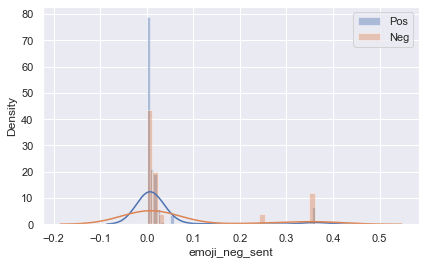

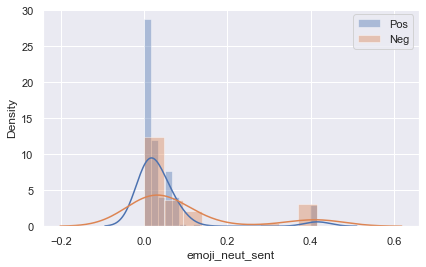

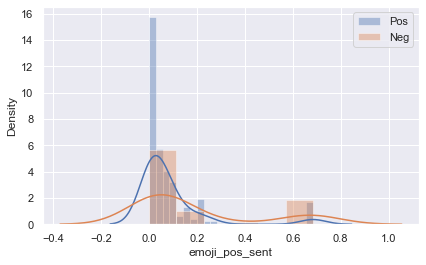

In [157]:
if not modelling:
    #plt.rcParams['figure.figsize'] = [16, 6]
    emoji_columns = ['emoji_neg_sent','emoji_neut_sent','emoji_pos_sent']
    for emoji_col  in emoji_columns:
        plot1 = sns.distplot(df[(df['Status'] == 0) & (df['has_emoji'] > 0)][emoji_col].dropna(),label='Pos')
        plot2 = sns.distplot(df[(df['Status'] == 1) & (df['has_emoji'] > 0)][emoji_col].dropna(),label='Neg')
        #plot1.set(xscale="log")
        #plot2.set(xscale="log")
        plt.legend()
        plt.show()

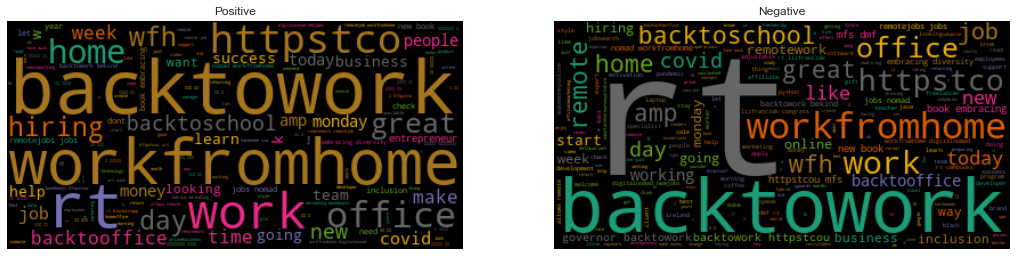

In [158]:
from wordcloud import WordCloud
from sklearn.feature_extraction import text 

if not modelling:
    stop_words = text.ENGLISH_STOP_WORDS

    # Set two wordclouds images,one per class
    plt.rcParams['figure.figsize'] = [16, 6]
    wc = WordCloud(stopwords=stop_words, background_color="BLACK", colormap="Dark2",max_font_size=150, random_state=12457)

    wc.generate(df[df['Status']==0]['text'].str.cat(sep=' '))
    plt.subplot(1,2,1)
    plt.imshow(wc,interpolation='bilinear')
    plt.axis("off")
    plt.title('Positive')
    wc.generate(df[df['Status']==1]['text'].str.cat(sep=' '))
    plt.subplot(1,2,2)
    plt.imshow(wc,interpolation='bilinear')
    plt.axis("off")
    plt.title('Negative')

    plt.show()

In [159]:
mask = np.array(Image.open("twitter1.png"))
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [160]:
from sklearn.model_selection import train_test_split
import os, pickle

exists = os.path.isfile('train_df.csv') # Check if there is one of the supposed stored files
if exists and modelling:
    train_df = pd.read_pickle('train_df.csv')
    dev_df = pd.read_pickle('dev_df.csv')
    test_df = pd.read_pickle('test_df.csv')   
else:
    train_df, dev_test_df = train_test_split(df, test_size=0.25, random_state = 4321) # 70% for training
    dev_df, test_df = train_test_split(dev_test_df, test_size=0.4, random_state = 6789) # 15% for developping and 10% for final testing
       
    pickle.dump(train_df, open('train_df.csv', 'wb'))
    pickle.dump(dev_df, open('dev_df.csv', 'wb'))
    pickle.dump(test_df, open('test_df.csv', 'wb'))

In [161]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# COUNTs
count_vec = CountVectorizer(stop_words=stop_words,strip_accents = 'unicode',ngram_range = [1,1], min_df = 3)

train_dtm = count_vec.fit_transform(train_df['text'])
dev_dtm = count_vec.transform(dev_df['text'])
test_dtm = count_vec.transform(test_df['text'])

train_dtm_df = pd.DataFrame(train_dtm.toarray(), columns=count_vec.get_feature_names())
dev_dtm_df = pd.DataFrame(dev_dtm.toarray(), columns=count_vec.get_feature_names())
test_dtm_df = pd.DataFrame(test_dtm.toarray(), columns=count_vec.get_feature_names())

train_dtm_df.index = train_df.index
dev_dtm_df.index = dev_df.index
test_dtm_df.index = test_df.index

train_dtm_df = pd.concat([train_df,train_dtm_df], axis = 1).reset_index()
dev_dtm_df = pd.concat([dev_df,dev_dtm_df], axis = 1).reset_index()
test_dtm_df = pd.concat([test_df,test_dtm_df], axis = 1).reset_index()

#TF-IDF
count_idf_vec = TfidfVectorizer(stop_words=stop_words,strip_accents = 'unicode',ngram_range = [1,1], min_df = 3)

train_dtm_idf = count_idf_vec.fit_transform(train_df['text'])
dev_dtm_idf = count_idf_vec.transform(dev_df['text'])
test_dtm_idf = count_idf_vec.transform(test_df['text'])

train_dtm_idf_df = pd.DataFrame(train_dtm_idf.toarray(), columns=count_idf_vec.get_feature_names())
dev_dtm_idf_df = pd.DataFrame(dev_dtm_idf.toarray(), columns=count_idf_vec.get_feature_names())
test_dtm_idf_df = pd.DataFrame(test_dtm_idf.toarray(), columns=count_idf_vec.get_feature_names())

train_dtm_idf_df.index = train_df.index
dev_dtm_idf_df.index = dev_df.index
test_dtm_idf_df.index = test_df.index

train_dtm_idf_df = pd.concat([train_df,train_dtm_idf_df], axis = 1).reset_index()
dev_dtm_idf_df = pd.concat([dev_df,dev_dtm_idf_df], axis = 1).reset_index()
test_dtm_idf_df = pd.concat([test_df,test_dtm_idf_df], axis = 1).reset_index()

In [162]:
harmful_words_serie = train_dtm_df[train_dtm_df['Status']==0].sum(numeric_only = True).iloc[18:] # The index plus the other non proper word features are skipped
non_harmful_words_serie = train_dtm_df[train_dtm_df['Status']==1].sum(numeric_only = True).iloc[18:] # The index plus the other non proper word features are skipped
harm_top_serie = harmful_words_serie.sort_values(ascending=False).head(30)
non_harm_top_serie = non_harmful_words_serie.sort_values(ascending=False).head(30)

harm_top_words = set(harm_top_serie.keys())
non_harm_top_words = set(non_harm_top_serie.keys())
add_stop_words = harm_top_words.intersection(non_harm_top_words)
harm_top_serie
non_harm_top_serie

add_stop_words

{'amp',
 'backtooffice',
 'backtoschool',
 'backtowork',
 'covid',
 'day',
 'great',
 'hiring',
 'home',
 'httpstco',
 'job',
 'jobs',
 'like',
 'new',
 'office',
 'remote',
 'rt',
 'time',
 'wfh',
 'work',
 'workfromhome',
 'working'}

In [163]:
# Computing the DTM_DFs (count and tf-idf representations) again adding this new stopwords

stop_words_new = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# COUNTs
count_vec = CountVectorizer(stop_words=stop_words_new,strip_accents = 'unicode',ngram_range = [1,1], min_df = 3)

train_dtm = count_vec.fit_transform(train_df['text'])
dev_dtm = count_vec.transform(dev_df['text']) # Check that dev and test are only applying the transformation did on the train set
test_dtm = count_vec.transform(test_df['text'])

train_dtm_df = pd.DataFrame(train_dtm.toarray(), columns=count_vec.get_feature_names())
dev_dtm_df = pd.DataFrame(dev_dtm.toarray(), columns=count_vec.get_feature_names())
test_dtm_df = pd.DataFrame(test_dtm.toarray(), columns=count_vec.get_feature_names())

train_dtm_df.index = train_df.index
dev_dtm_df.index = dev_df.index
test_dtm_df.index = test_df.index

train_dtm_df = pd.concat([train_df,train_dtm_df], axis = 1).reset_index()
dev_dtm_df = pd.concat([dev_df,dev_dtm_df], axis = 1).reset_index()
test_dtm_df = pd.concat([test_df,test_dtm_df], axis = 1).reset_index()   

#TF-IDF
count_idf_vec = TfidfVectorizer(stop_words=stop_words_new,strip_accents = 'unicode',ngram_range = [1,1], min_df = 3)

train_dtm_idf = count_idf_vec.fit_transform(train_df['text'])
dev_dtm_idf = count_idf_vec.transform(dev_df['text'])
test_dtm_idf = count_idf_vec.transform(test_df['text'])

train_dtm_idf_df = pd.DataFrame(train_dtm_idf.toarray(), columns=count_idf_vec.get_feature_names())
dev_dtm_idf_df = pd.DataFrame(dev_dtm_idf.toarray(), columns=count_idf_vec.get_feature_names())
test_dtm_idf_df = pd.DataFrame(test_dtm_idf.toarray(), columns=count_idf_vec.get_feature_names())

train_dtm_idf_df.index = train_df.index
dev_dtm_idf_df.index = dev_df.index
test_dtm_idf_df.index = test_df.index

train_dtm_idf_df = pd.concat([train_df,train_dtm_idf_df], axis = 1).reset_index()
dev_dtm_idf_df = pd.concat([dev_df,dev_dtm_idf_df], axis = 1).reset_index()
test_dtm_idf_df = pd.concat([test_df,test_dtm_idf_df], axis = 1).reset_index()

In [164]:
print(train_dtm.sum(0))

[[ 4  3  3  4  4  4  3 14  4  3  4 15 11  6  4  3  4  4  4  3 14  4  5  3
  10  3  3  4  3  4  3  4  3  4 16  3  3  4  5  3  3  3  3  5  3  4  6  5
   4  9  7  3  5  4  5  4  3  3  4  4  4  3  5 22  3 13  6  3  3  3  4  8
   7  6  4 11  9  4  6  4 25 10  4  3  4  4  3  7  4  3  6  9  4  3  3  3
   9  6  3  3  3  4  4 31  5  4  3  8  5  3  6 14  5  3  3  4  3  3  3  4
  13  4  3  8  4  6  5  3 12  4  3  8  4  4  7  4  6 11  3  4  4  7  3  4
  10  5  8  9  7  9  9  4  3  3  3 15  4  4  3  5  3  3  3  4  3  3  8  4
  14  7  4 13  4  4  6  5  3  7  4  3  3  6 22  3 10  4  9  3 14 13  3  3
   4  8  9  5  5  3 12  6  4  8 12  3  5  9 22  5  3  4 22 15  7  7  6  3
  15  4  3  3  5  4 10  4  3  7  8  3  3  3  4  4  5  3  7 21 17  5  3  7
   4  4 19  9  3 19  3  3  5  3  5 13  3  5  5  3  5  3  5  6  4  6  3  3
   3  3  3  3 16  4 14  8  3 16  8  3  5  3  3  6  5  4  7  3  3  6 11  7
   5  7  4  7 11 10  5  6  4  5  6 10  3  8  3  8  3  5  3  7  5  7 15  3
   5  3  3  3 12  5 10 12  4  5  3 30 

In [165]:
# First compute ad-hoc function the 
def words_prob_vector(class_0_1):
    p = X[y==class_0_1].sum(0)
    return (p+1) / ((y==class_0_1).sum()+1)

def nb_prediction(dtm_matrix,w,b):
    predictions = (dtm_matrix @ w +b)>0
    return predictions

In [166]:
#Naive Bayes
X = train_dtm.toarray()
y = train_df['Status']
w_nb = np.log(words_prob_vector(1)/words_prob_vector(0)) # This weights in NB are learn based on "first" principles, assuming the "naive" of conditional independence given a comment is harmful or not
bias = np.log((y ==1).mean()/(y==0).mean())
# Now given a comment, the prediction is = (term_representation*wb + b) and assuming a threshold of 50% of harmful/non-harmful if this is greater than 0 => Class 1 else 0
train_error=(nb_prediction(train_dtm.toarray(),w_nb,bias)==train_df['Status']).mean()
dev_error=(nb_prediction(dev_dtm.toarray(),w_nb,bias)==dev_df['Status']).mean()
print(f'Naive Bayes ==> Train_Accuracy:{train_error} - Dev_Accuracy:{dev_error}')

Naive Bayes ==> Train_Accuracy:0.7708333333333334 - Dev_Accuracy:0.5644171779141104


In [167]:
#logistic regression
from sklearn.linear_model import LogisticRegression
m = LogisticRegression(C=0.01, penalty='l1',solver='liblinear') # C is the inverse of the reg coefficient, bigger values imply less regularization (this is like no regularization)
m.fit(train_dtm.toarray(), train_df['Status']) # It is already loaded the train values from the NB model
train_error = (m.predict(train_dtm.toarray())==train_df['Status']).mean()
dev_error = (m.predict(dev_dtm.toarray())==dev_df['Status']).mean()
print(f'Logistic Regression ==> Train_Accuracy:{train_error} - Dev_Accuracy:{dev_error}')

Logistic Regression ==> Train_Accuracy:0.741421568627451 - Dev_Accuracy:0.754601226993865


In [168]:
# Compare Algorithms
import pandas
import os
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [169]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('BC', BaggingClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
LinearDiscriminantAnalysis, KNeighborsClassifier, DecisionTreeClassifier, GaussianNB,RandomForestClassifier,BaggingClassifier, GradientBoostingClassifier

LR: 0.688678 (0.035603)
LDA: 0.554983 (0.058324)
KNN: 0.654321 (0.044034)
CART: 0.628516 (0.043448)
NB: 0.600376 (0.035160)
SVM: 0.725459 (0.037398)
RFC: 0.665266 (0.043447)
BC: 0.633454 (0.033517)
GBC: 0.710629 (0.046971)


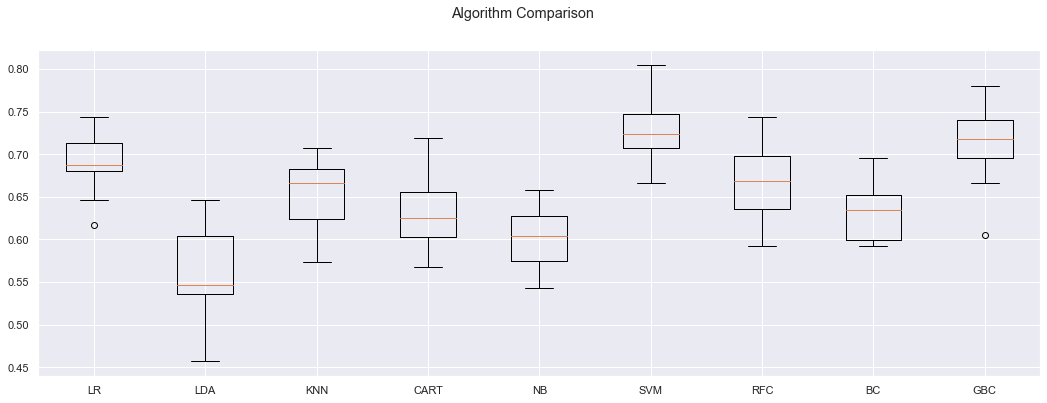

In [170]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()